<a href="https://colab.research.google.com/github/nayrr25/An-lisis-de-inconsistencias-en-licitaci-n-p-blica/blob/main/An%C3%A1lisis_de_datos_iniciados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><font color="#004D7F" size=6> Análisis de datos</font></h2>



<h1><font color="#004D7F" size=5>1. Cargar el conjunto de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Nancy Raquel Rodríguez Ramos</font><br>
<font color="#004D7F" size=3>Propuesta para exploración inicial de datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Cargar CSV](#section2)
    * [2.1. Desde Pandas](#section2)
* [3. Descripción del conjunto de datos](#section3)
* [4. Distribución entre clases: _groupby('class').size()_](#section4)
* [5.Correlaciones](#section5)
* [6.Asimetría](#section6)
* [7. Visualización Univariable](#section7)
    * [7.1. Histogramas](#section71)
    * [7.3. Boxplot](#section73)
    * [7.4. Valores únicos en cada variable del dataframe](#section74)
* [8.Valores nulos](#section8)
* [9.Dispersión por clase](#section9)
* [10.Informe HTML de la base](#section10)

In [ ]:
import os

# Load libraries
import os
%matplotlib inline
from itertools import cycle, islice
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from pandas import read_csv
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import norm
from sklearn import cluster, datasets
from sklearn import datasets, metrics, model_selection, svm
from sklearn import preprocessing
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # for Support Vector Classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import check_is_fitted
import matplotlib.pyplot as plt
import missingno as msno
import multiprocessing
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import scipy.cluster.hierarchy as sch
import scipy.stats
import seaborn as sns
import time
import warnings
pd.set_option('display.max_columns', 60)
warnings.filterwarnings('ignore')

In [ ]:
# Especifica la ruta del directorio

# Especifica la ruta del directorio
dir = "C:\\Users\\114310416\\Documents\\Data Challenge\\data"
dir2= "C:\\Users\\114310416\\Documents\\Data Challenge\\Resultados Finales"

In [ ]:
# Lista todos los archivos en el directorio
archivos = os.listdir(dir)

# Filtra solo los archivos (no directorios) si es necesario
archivos = [archivo for archivo in archivos if os.path.isfile(os.path.join(dir, archivo))]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\114310416\\Documents\\Data Challenge\\data'

# Funciones

In [ ]:
def encuentra_archivo(directorio, palabra):
    """
    Encuentra archivos en un directorio que contienen una palabra en el nombre.

    Parámetros:
    - directorio (str): Ruta del directorio donde buscar archivos.
    - palabra (str): Palabra a buscar en el nombre de los archivos.

    Retorna:
    - archivos_con_palabra (list): Lista de nombres de archivos que contienen la palabra.
    """

    # Lista todos los archivos en el directorio
    archivos = os.listdir(directorio)

    # Filtra solo los archivos (no directorios) si es necesario
    archivos = [archivo for archivo in archivos if os.path.isfile(os.path.join(directorio, archivo))]

    # Filtra los archivos que contienen la palabra en el nombre
    archivos_con_palabra = [archivo for archivo in archivos if palabra in archivo]

    # Imprime la lista de archivos que contienen la palabra
    for archivo in archivos_con_palabra:
        print(archivo)

    return archivos_con_palabra


# Apertura de Archivos

In [ ]:
directorio = dir
palabra_a_buscar = "proc"
archivos_encontrados = encuentra_archivo(directorio, palabra_a_buscar)

# Selecciona un archivo específico de la lista
nombre_archivo_seleccionado = archivos_encontrados[1]  # Cambia el índice según tus necesidades

# Lee el archivo Excel
df = pd.read_csv(os.path.join(directorio, nombre_archivo_seleccionado), sep=",", header=0)

procedimientosadjudicados.csv
procedimientosiniciados.csv
procedimientosofertados.csv


In [ ]:
directorio = dir
palabra_a_buscar = "adju"
archivos_encontrados = encuentra_archivo(directorio, palabra_a_buscar)

# Selecciona un archivo específico de la lista
nombre_archivo_seleccionado = archivos_encontrados[0]  # Cambia el índice según tus necesidades

# Lee el archivo Excel
adjudicados = pd.read_csv(os.path.join(directorio, nombre_archivo_seleccionado), sep=",", header=0)

procedimientosadjudicados.csv


In [ ]:
directorio = dir
palabra_a_buscar = "pro"
archivos_encontrados = encuentra_archivo(directorio, palabra_a_buscar)

# Selecciona un archivo específico de la lista
nombre_archivo_seleccionado = archivos_encontrados[2]  # Cambia el índice según tus necesidades

# Lee el archivo Excel
ofertados= pd.read_csv(os.path.join(directorio, nombre_archivo_seleccionado), sep=",", header=0)

procedimientosadjudicados.csv
procedimientosiniciados.csv
procedimientosofertados.csv


In [ ]:
import pandas as pd
#df=pd.read_csv("iris.data.csv", sep=",", header=0)

Muchos conjuntos de datos ya vienen ya por defecto en Python a través de la librería [scikit-learn](https://scikit-learn.org/stable/datasets/index.html), lo que significa que no necesita cargar el paquete explícitamente. Estos conjunto de datos se encuentran dentro del módulo `datasets` y de ahí podrán cargarse de manera muy sencillo cargarlo

<a id="section3"></a>
# <font color="#004D7F"> 3. Descripción de conjuntos de datos</font>

In [ ]:
df.shape

(1299998, 32)

Para visualizar cuales columnas tiene el archivo

In [ ]:
df.columns

Index(['Clave_iniciado_pk', 'nro_sicop', 'numero_linea', 'numero_partida',
       'subpartida_og', 'cedula_institucion', 'nombre_institucion',
       'nro_procedimiento', 'fecha_publicacion', 'fecha_invitacion',
       'ano_publicacion', 'ano_invitacion', 'tipo_procedimiento',
       'modalidad_procedimiento', 'excepcion_cd', 'objeto_contractual',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_moneda',
       'tipo_cambio_crc', 'tipo_cambio_dolar', 'monto_estimado_linea',
       'Cod_Nivel1', 'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto',
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto'],
      dtype='object')

Cambios de nombres que se escribe el nombreactual:nombreacambiar

Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

Los siguientes comandos nos muestran las 5 primeros filas y las 5 últimas filas.

In [ ]:
df.head(25)

,Clave_iniciado_pk,nro_sicop,numero_linea,numero_partida,subpartida_og,cedula_institucion,nombre_institucion,nro_procedimiento,fecha_publicacion,fecha_invitacion,ano_publicacion,ano_invitacion,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,objeto_contractual,cantidad_solicitada,precio_unitario_estimado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,monto_estimado_linea,Cod_Nivel1,Nivel1_producto,Cod_Nivel2,Nivel2_producto,Cod_Nivel3,Nivel3_producto,Cod_Nivel4,Nivel4_producto,Cod1_detalle,detalle1_producto
0,2016110137722517250492006241,20161101377,2,2,2.04.02,2100042010,MINISTERIO DE SALUD,2016CD-000061-0009200001,2016-11-28 14:44:01,2016-11-28 14:44:01,2016,2016,CONTRATACIÓN DIRECTA,Cantidad definida,Contratación directa por escasa cuantía (art.2...,COMPRA DE LLANTAS PARA VEHICULOS DEL NIVEL REG...,86.0,98500.00,CRC,559.53,559.53,8471000.00,25.0,"Vehículos Comerciales, Militares y Particulare...",2517.0,Componentes y sistemas para equipo de transporte,251725.0,Llantas y neumáticos,25172504.0,Llantas para automóviles y carga liviana,2517250492006241,"NEUMATICO (LLANTA) DE 245/75R16, INDICE DE CAR..."
1,2019040108528111181292123892,20190401085,2,1,1.08.08,3101218766,INS VALORES PUESTO DE BOLSA SOCIEDAD ANONIMA,2019CD-000001-0011500001,2019-04-22 13:15:31,2019-04-22 13:15:31,2019,2019,CONTRATACIÓN DIRECTA,Servicios,Contrataciones exceptuadas de los procedimient...,"Renovación de licenciamiento, mantenimiento y...",1.0,13500.00,USD,598.63,1.00,8081505.00,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811118.0,Servicio de Administración de Sistemas y Compo...,81111812.0,Mantenimiento o apoyo del hardware de ordenador,8111181292123892,SERVICIO DE MANTENIMIENTO PARA EQUIPOS MARCA F...
2,2013070015714321150392017791,20130700157,1,1,5.01.05,4000042139,INSTITUTO COSTARRICENSE DE ELECTRICIDAD,2013CD-000762-0000400001,2013-07-17 14:57:39,2013-07-17 14:57:39,2013,2013,CONTRATACIÓN DIRECTA,Cantidad definida,Contratación directa por escasa cuantía (art. ...,Microcomputadoras Portátiles,9.0,3400.00,USD,504.46,1.00,15436476.00,43.0,Telecomunicaciones y radiodifusión de tecnolog...,4321.0,Equipo informático y accesorios,432115.0,Computadoras,43211503.0,Computadoras Portátiles,4321150392017791,COMPUTADORA PORTÁTIL TRANSFORMABLES EN TABLETA...
3,2013100034417210150790004458,20131000344,1,1,1.08.01,2200042154,CONTRALORÍA GENERAL DE LA REPUBLICA,2013CD-000036-0005400001,2013-10-22 15:13:56,2013-10-22 15:13:56,2013,2013,CONTRATACIÓN DIRECTA,Cantidad definida,Contratación directa por escasa cuantía (art.2...,Adquisición servicio de pintura para piso,1.0,765000.00,CRC,506.08,506.08,765000.00,72.0,"Servicios de construcción, mantenimiento y rep...",7210.0,"Servicios de mantenimiento, reparación y const...",721015.0,Servicios de reparación y mantenimiento de edi...,72101507.0,Servicio de mantenimiento de edificio,7210150790004458,MANTENIMIENTO Y REPARACION EDIFICIOS
4,201512002075124410240292072892,20151200207,512,512,2.99.01,2100042005,MINISTERIO DE HACIENDA,2015LN-000002-0009100001,2015-12-17 16:01:00,2015-12-17 16:01:26,2015,2015,LICITACIÓN PÚBLICA NACIONAL,Convenio marco,NaN,Licitación de Convenio Marco para el suministr...,1.0,0.00,CRC,538.70,538.70,0.00,44.0,"Equipo, Accesorios y Suministros de Oficina",4410.0,"Maquinaria, suministros y accesorios de oficina",441024.0,Máquina Etiquetadora,44102402.0,Fechadores o numeradores,4410240292072892,"SELLO FECHADOR AUTOMATICO, METALICO, MEDIDAS 6..."
5,20161000628214320155392092242,20161000628,21,2,5.01.03,4000042139,INSTITUTO COSTARRICENSE DE ELECTRICIDAD,2016CD-001168-0000400001,2016-10-26 09:35:00,2016-10-26 09:35:23,2016,2016,CONTRATACIÓN DIRECTA,Según demanda,Contratación directa para productos compatible...,Adquisición de elementos de red (equipamiento)...,1.0,417.00,USD,559.98,1.00,233511.66,43.0,Telecomunicaciones y radiodifusión de tecnolog...,4320.0,"Componentes para tecnología de la información,...",432015.0,Módulos o

si por alguna razón nos sirve más ver los últimos 5

In [ ]:
df.tail(5)

,Clave_iniciado_pk,nro_sicop,numero_linea,numero_partida,subpartida_og,cedula_institucion,nombre_institucion,nro_procedimiento,fecha_publicacion,fecha_invitacion,ano_publicacion,ano_invitacion,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,objeto_contractual,cantidad_solicitada,precio_unitario_estimado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,monto_estimado_linea,Cod_Nivel1,Nivel1_producto,Cod_Nivel2,Nivel2_producto,Cod_Nivel3,Nivel3_producto,Cod_Nivel4,Nivel4_producto,Cod1_detalle,detalle1_producto
1299993,2020100031317210150792105861,20201000313,1,1,1.08.01,4000042140,INSTITUTO COSTARRICENSE DE PUERTOS DEL PACÍFICO,2020CD-000156-0019200001,2020-10-05 10:15:36,2020-10-05 10:15:36,2020,2020,CONTRATACIÓN DIRECTA,Servicios,Contratación directa para reparaciones indeter...,Mantenimiento urgente de la cubierta superior ...,1.0,742090.34,CRC,604.90,604.90,742090.34,72.0,"Servicios de construcción, mantenimiento y rep...",7210.0,"Servicios de mantenimiento, reparación y const...",721015.0,Servicios de reparación y mantenimiento de edi...,72101507.0,Servicio de mantenimiento de edificio,7210150792105861,MANTENIMIENTO Y REPARACIÓN DE INSTALACIONES
1299994,2022060293611311130792345416,20220602936,1,1,2.99.99,2100042006,MINISTERIO DE JUSTICIA Y PAZ,2022CD-000036-0006900001,2022-06-23 11:26:32,2022-06-23 11:26:32,2022,2022,CONTRATACIÓN DIRECTA,Cantidad definida,Contratación directa por escasa cuantía (art.2...,Adquisición de espumas de poliuretano para uso...,2705.0,10444.44,CRC,698.44,698.44,28252210.20,13.0,Resina y Colofonia y Caucho y Espuma y Películ...,1311.0,Resinas y colofonias y otros materiales deriva...,131113.0,Espumas,13111307.0,Espuma de uretano o poliuretano,1311130792345416,"ESPUMA DE POLIURETANO, MEDIDAS 81 cm ANCHO X 1..."
1299995,2023040075673121180390015178,20230400756,7,1,2.01.04,3007045942,PROGRAMA INTEGRAL DE MERCADEO AGROPECUARIO,2023LD-000016-0001600003,2023-04-18 12:17:17,2023-04-18 12:17:17,2023,2023,LICITACIÓN REDUCIDA,Cantidad definida,NaN,Compra de pintura para el mantenimiento del CE...,60.0,11519.00,CRC,539.69,539.69,691140.00,31.0,Componentes y Suministros de Fabricación,3121.0,"Pinturas, imprimaciones (premier) y acabados",312118.0,Disolventes y diluyentes para pinturas,31211803.0,Diluyentes para pinturas y barnices,3121180390015178,DISOLVENTE (DILUYENTE) P/PRIMARIO EPOXICO ORGA...
1299996,2022050290148111190192227970,20220502901,4,3,1.04.05,4000000019,BANCO DE COSTA RICA,2022CD-000028-0015700001,2022-06-16 10:44:05,2022-06-16 10:44:05,2022,2022,CONTRATACIÓN DIRECTA,Según demanda,Contratación directa por ser oferente único (A...,Actualización y Configuración del Sistema Soft...,1.0,3800.00,USD,689.41,1.00,2619758.00,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811119.0,Sistemas de recuperación de la información,81111901.0,Recuperación de la información de la base de d...,8111190192227970,SERVICIO DE RECUPERACIÓN DE INFORMACIÓN DE BAS...
1299997,20240626926225310300192404732,20240626926,22,2,2.99.04,3101000046,COMPAÑÍA NACIONAL DE FUERZA Y LUZ SOCIEDAD ANÓ...,2024LE-000035-0000200001,2024-06-12 08:29:00,2024-06-12 08:29:10,2024,2024,LICITACIÓN MENOR,Según demanda,NaN,Uniforme para personal operativo de la CNFL,1.0,16240.00,CRC,530.09,530.09,16240.00,53.0,"Ropa, Maletas y Productos de Aseo Personal",5310.0,Ropa,531030.0,Camisetas,53103001.0,Camisetas de caballero,5310300192404732,"CAMISETA PARA HOMBRE TIPO POLO MANGA LARGA, MA..."


Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

Con el siguiente comando podemos ver los tipos de datos registrados en cada variable, se debe tomar en cuenta para toma de decisiones de transformaciones o cambio de tipo de variable requerido en próximos análisis

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
   print(df.dtypes)

Clave_iniciado_pk            object
nro_sicop                     int64
numero_linea                  int64
numero_partida                int64
subpartida_og                object
cedula_institucion            int64
nombre_institucion           object
nro_procedimiento            object
fecha_publicacion            object
fecha_invitacion             object
ano_publicacion               int64
ano_invitacion                int64
tipo_procedimiento           object
modalidad_procedimiento      object
excepcion_cd                 object
objeto_contractual           object
cantidad_solicitada         float64
precio_unitario_estimado    float64
tipo_moneda                  object
tipo_cambio_crc             float64
tipo_cambio_dolar           float64
monto_estimado_linea        float64
Cod_Nivel1                  float64
Nivel1_producto              object
Cod_Nivel2                  float64
Nivel2_producto              object
Cod_Nivel3                  float64
Nivel3_producto             

Verificación del cambio de tipo de variable

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes.head(15))

Clave_iniciado_pk          object
nro_sicop                   int64
numero_linea                int64
numero_partida              int64
subpartida_og              object
cedula_institucion          int64
nombre_institucion         object
nro_procedimiento          object
fecha_publicacion          object
fecha_invitacion           object
ano_publicacion             int64
ano_invitacion              int64
tipo_procedimiento         object
modalidad_procedimiento    object
excepcion_cd               object
dtype: object


Cuando queremos un descriptivo estadístico de las variables numéricas, se puede obtener de la siguiente manera

In [ ]:
df.describe()

,nro_sicop,numero_linea,numero_partida,cedula_institucion,ano_publicacion,ano_invitacion,cantidad_solicitada,precio_unitario_estimado,tipo_cambio_crc,tipo_cambio_dolar,monto_estimado_linea,Cod_Nivel1,Cod_Nivel2,Cod_Nivel3,Cod_Nivel4,Cod1_detalle
count,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.299998e+06,1.294879e+06,1.294879e+06,1.294879e+06,1.299840e+06,1.299998e+06
mean,2.020352e+10,3.606003e+01,1.416866e+01,3.335950e+09,2.020286e+03,2.020286e+03,2.473535e+03,7.979750e+06,5.839805e+02,5.512115e+02,1.510389e+08,5.032151e+01,5.046438e+03,5.046648e+05,5.044526e+07,5.044357e+15
std,2.799576e+07,8.869465e+01,4.795371e+01,5.886648e+08,2.801544e+00,2.801544e+00,2.644679e+05,9.524772e+08,4.606242e+01,1.419172e+02,1.419062e+11,2.133280e+01,2.132557e+03,2.132554e+05,2.132301e+07,2.132287e+15
min,2.010120e+10,1.000000e+00,1.000000e+00,2.100042e+09,2.010000e+03,2.010000e+03,0.000000e+00,0.000000e+00,5.025900e+02,8.200000e-01,0.000000e+00,1.000000e+01,1.010000e+03,1.010150e+05,1.010151e+07,1.010151e+15
25%,2.019020e+10,2.000000e+00,1.000000e+00,3.007476e+09,2.019000e+03,2.019000e+03,1.000000e+00,2.050000e+03,5.436500e+02,5.412900e+02,2.112500e+04,3.900000e+01,3.910000e+03,3.910190e+05,3.910190e+07,3.910190e+15
50%,2.021070e+10,8.000000e+00,1.000000e+00,3.014042e+09,2.021000e+03,2.021000e+03,2.000000e+00,1.578537e+04,5.774800e+02,5.749400e+02,1.500000e+05,4.400000e+01,4.410000e+03,4.410310e+05,4.410310e+07,4.410311e+15
75%,2.022120e+10,3.100000e+01,7.000000e+00,4.000042e+09,2.022000e+03,2.022000e+03,1.400000e+01,1.650000e+05,6.199300e+02,6.166000e+02,9.365780e+05,7.200000e+01,7.214000e+03,7.214170e+05,7.214121e+07,7.214121e+15
max,2.024073e+10,1.974000e+03,9.990000e+02,4.000153e+09,2.024000e+03,2.024000e+03,1.350000e+08,5.398281e+11,6.984400e+02,6.984400e+02,1.615900e+14,9.500000e+01,9.514000e+03,9.514180e+05,9.514180e+07,9.514180e+15


<a id="section4"></a>
## <font color="#004D7F">4. Distribución entre clases: _groupby('class').size()_ </font>

Puede ver que hay casi el doble de observaciones con la clase 0 (sin aparición de diabetes) que con la clase 1 (aparición de diabetes). En este caso podemos observar que las clases se encuentran desbalanceadas por lo que los tenemos que analizar muy los resultados de los algoritmos.

In [ ]:
df.columns

Index(['Clave_iniciado_pk', 'nro_sicop', 'numero_linea', 'numero_partida',
       'subpartida_og', 'cedula_institucion', 'nombre_institucion',
       'nro_procedimiento', 'fecha_publicacion', 'fecha_invitacion',
       'ano_publicacion', 'ano_invitacion', 'tipo_procedimiento',
       'modalidad_procedimiento', 'excepcion_cd', 'objeto_contractual',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_moneda',
       'tipo_cambio_crc', 'tipo_cambio_dolar', 'monto_estimado_linea',
       'Cod_Nivel1', 'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto',
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto'],
      dtype='object')

In [ ]:
df['cedula_institucion'].value_counts()

cedula_institucion
4000042147    142700
4000042139    132156
4000042149     43838
4000001902     43371
3014042058     35700
               ...  
3002071506         1
3101354641         1
3008243410         1
3002694741         1
3002284440         1
Name: count, Length: 398, dtype: int64

In [ ]:
df["tipo_procedimiento"].value_counts()

tipo_procedimiento
CONTRATACIÓN DIRECTA              712619
LICITACIÓN REDUCIDA               195028
LICITACIÓN ABREVIADA              155191
LICITACIÓN MENOR                   58051
LICITACIÓN PÚBLICA NACIONAL        53041
LICITACIÓN MAYOR                   37987
PROCEDIMIENTO POR PRINCIPIO        31121
CONTRATACIÓN ESPECIAL              25991
PROCEDIMIENTO POR EXCEPCIÓN        23424
PROCEDIMIENTOS ESPECIALES           7023
LICITACIÓN PÚBLICA INTERNACION       469
SUBASTA INVERSA ELECTRÓNICA           53
Name: count, dtype: int64

In [ ]:
df['ano_publicacion'].value_counts()

ano_publicacion
2022    219764
2023    218199
2021    179166
2020    134042
2019    124853
2024    105000
2018     99076
2017     77689
2016     52452
2015     31668
2014     26594
2013     16395
2012     13377
2011      1720
2010         3
Name: count, dtype: int64

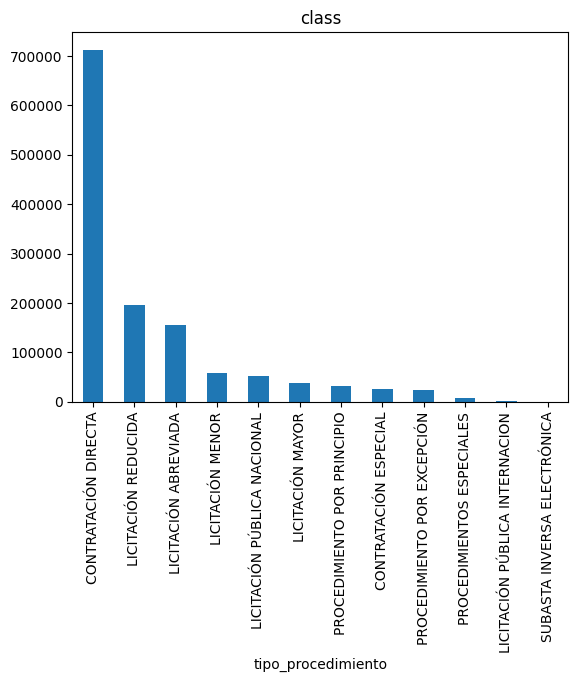

In [ ]:
import matplotlib.pyplot as plt
# Gráfico de barras de donaciones por edad
pd.value_counts(df["tipo_procedimiento"]).plot(kind='bar', title='class')
plt.show(abs)

<a id="section5"></a>
## <font color="#004D7F"> 5. Correlaciones: _corr()_ </font>

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [ ]:
import numpy as np
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int',"uint8","int32"]).corr(method='spearman')
tidy=tidy_corr_matrix(corr_matrix)

In [ ]:
tidy.head(25)

,variable_1,variable_2,r,abs_r
84,ano_invitacion,ano_publicacion,1.000000,1.000000
69,ano_publicacion,ano_invitacion,1.000000,1.000000
254,Cod1_detalle,Cod_Nivel4,0.999993,0.999993
239,Cod_Nivel4,Cod1_detalle,0.999993,0.999993
222,Cod_Nivel3,Cod_Nivel4,0.999978,0.999978
237,Cod_Nivel4,Cod_Nivel3,0.999978,0.999978
253,Cod1_detalle,Cod_Nivel3,0.999971,0.999971
223,Cod_Nivel3,Cod1_detalle,0.999971,0.999971
205,Cod_Nivel2,Cod_Nivel3,0.999892,0.999892
220,Cod_Nivel3,Cod_Nivel2,0.999892,0.999892


Si se quiere extraer el cuadro de correlaciones porque es muy grande, se puede exportar a excel para ver con mayor claridad

In [ ]:
#tidy.to_excel("corr.xlsx")

Con la siguiente matriz de correlación se puede ver un mapa de calor según el nivel de correlación, que obtuvimos en la estimación anterior

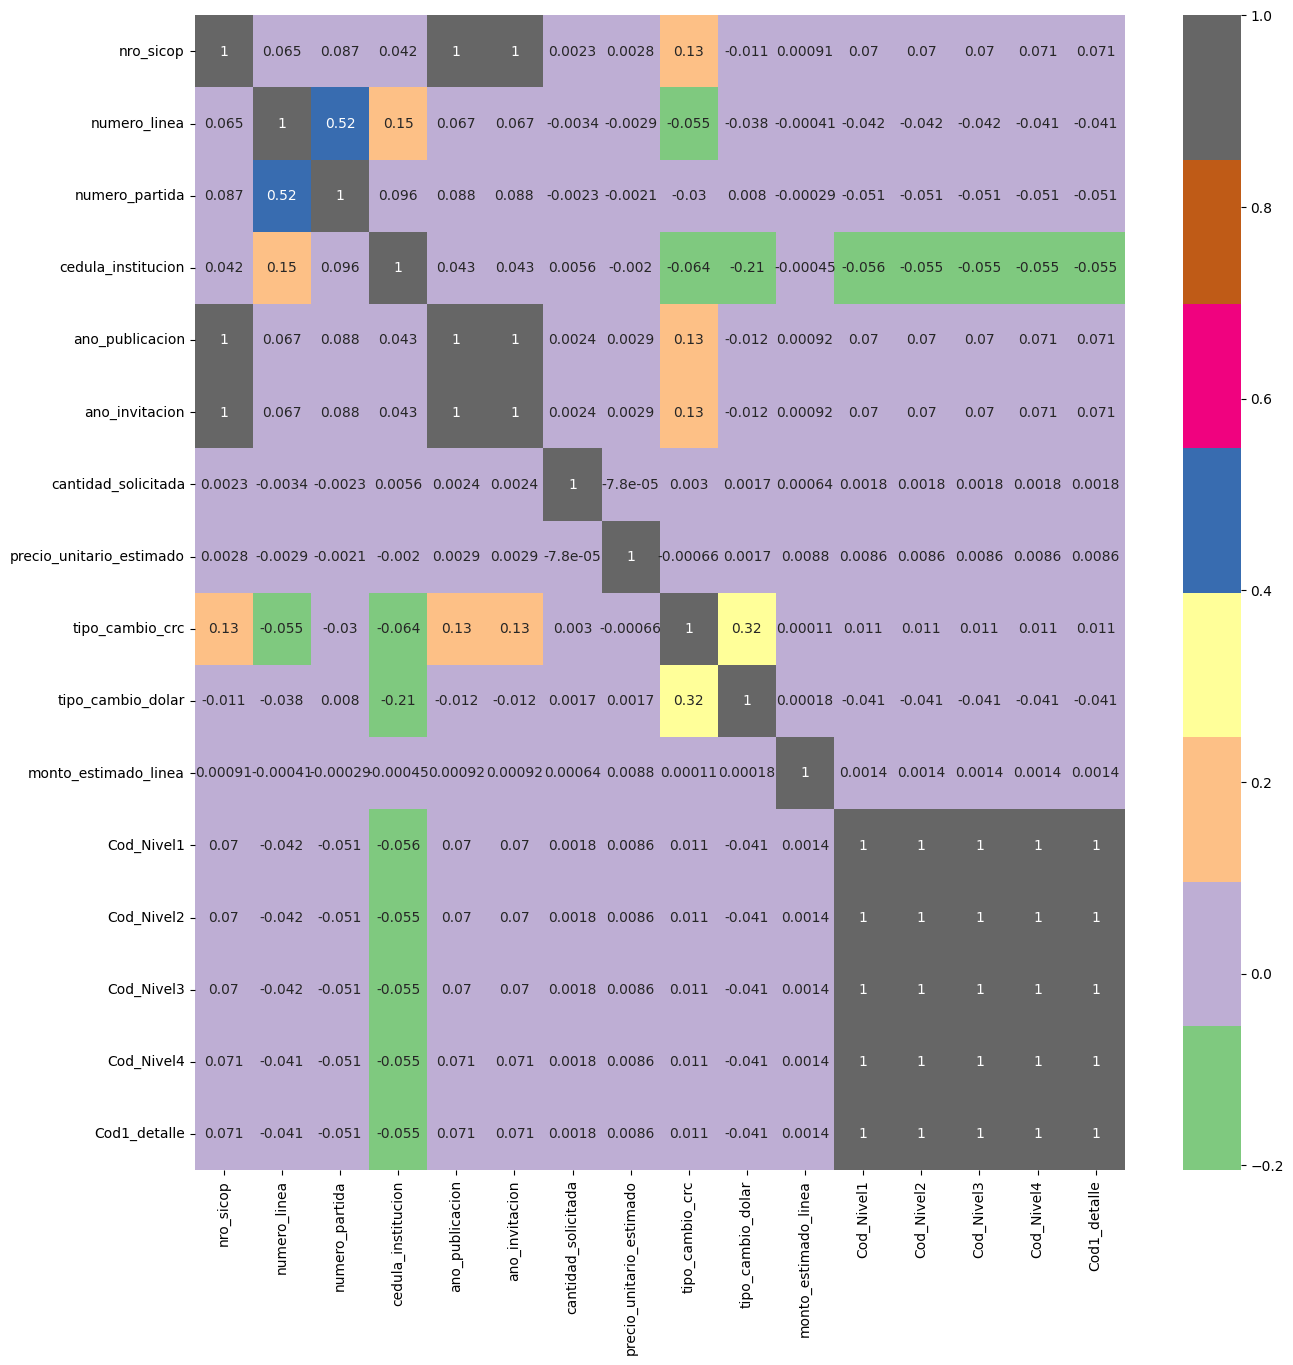

In [ ]:
import seaborn as sns
#Matriz de correlación de variables continuas.
top_corr_features=corr_matrix.index
plt.figure(figsize=(15,15))
fig=sns.heatmap(df[top_corr_features].corr(),annot=True,
                cmap="Accent")

In [ ]:

continuos= df.select_dtypes(include=['float64', 'int',"uint8","int32"])
continuos.columns

Index(['nro_sicop', 'numero_linea', 'numero_partida', 'cedula_institucion',
       'ano_publicacion', 'ano_invitacion', 'cantidad_solicitada',
       'precio_unitario_estimado', 'tipo_cambio_crc', 'tipo_cambio_dolar',
       'monto_estimado_linea', 'Cod_Nivel1', 'Cod_Nivel2', 'Cod_Nivel3',
       'Cod_Nivel4', 'Cod1_detalle'],
      dtype='object')

Opciones para analizar las relaciones entre pares,
Gráficos de dispersión y de distribución respecto a alguna categoría

In [ ]:
#sns.pairplot(continuos, palette = 'coolwarm')

<a id="section6"></a>
## <font color="#004D7F">6. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizando la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [ ]:
continuos.skew()

nro_sicop                     -0.847480
numero_linea                   7.230970
numero_partida                 8.348763
cedula_institucion            -0.202469
ano_publicacion               -0.841366
ano_invitacion                -0.841366
cantidad_solicitada          318.946446
precio_unitario_estimado     387.095920
tipo_cambio_crc                0.320651
tipo_cambio_dolar             -3.206832
monto_estimado_linea        1135.907219
Cod_Nivel1                     0.357328
Cod_Nivel2                     0.356057
Cod_Nivel3                     0.356035
Cod_Nivel4                     0.357659
Cod1_detalle                   0.357783
dtype: float64

* Si una distribución parece casi
gaussiana pero se empuja hacia
la izquierda o hacia la derecha,
es útil conocer el sesgo.
* Valores cercanos a cero tienen
un menor sesgo, sin embargo,
sesgo a la izquierda será con
valores negativos y sesgo a la
derecha serán valores positivos.

Visualización de la asimetría

In [ ]:

# import seaborn as sns
# #histogram and normal probability plot
# sns.distplot(continuos['precio_unitario_estimado'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(continuos['precio_unitario_estimado'], plot=plt)

<a id="section7"></a>
# <font color="#004D7F"> 7. Visualización Univariable</font>

Las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="section71"></a>
## <font color="#004D7F">7.1. Histogramas </font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudarlo a ver posibles valores atípicos, por lo que [Matplotlib](https://www.datacamp.com/community/tutorials/histograms-matplotlib) es una pontente librería de visualización de datos

array([[<Axes: title={'center': 'nro_sicop'}>,
        <Axes: title={'center': 'numero_linea'}>,
        <Axes: title={'center': 'numero_partida'}>,
        <Axes: title={'center': 'cedula_institucion'}>],
       [<Axes: title={'center': 'ano_publicacion'}>,
        <Axes: title={'center': 'ano_invitacion'}>,
        <Axes: title={'center': 'cantidad_solicitada'}>,
        <Axes: title={'center': 'precio_unitario_estimado'}>],
       [<Axes: title={'center': 'tipo_cambio_crc'}>,
        <Axes: title={'center': 'tipo_cambio_dolar'}>,
        <Axes: title={'center': 'monto_estimado_linea'}>,
        <Axes: title={'center': 'Cod_Nivel1'}>],
       [<Axes: title={'center': 'Cod_Nivel2'}>,
        <Axes: title={'center': 'Cod_Nivel3'}>,
        <Axes: title={'center': 'Cod_Nivel4'}>,
        <Axes: title={'center': 'Cod1_detalle'}>]], dtype=object)

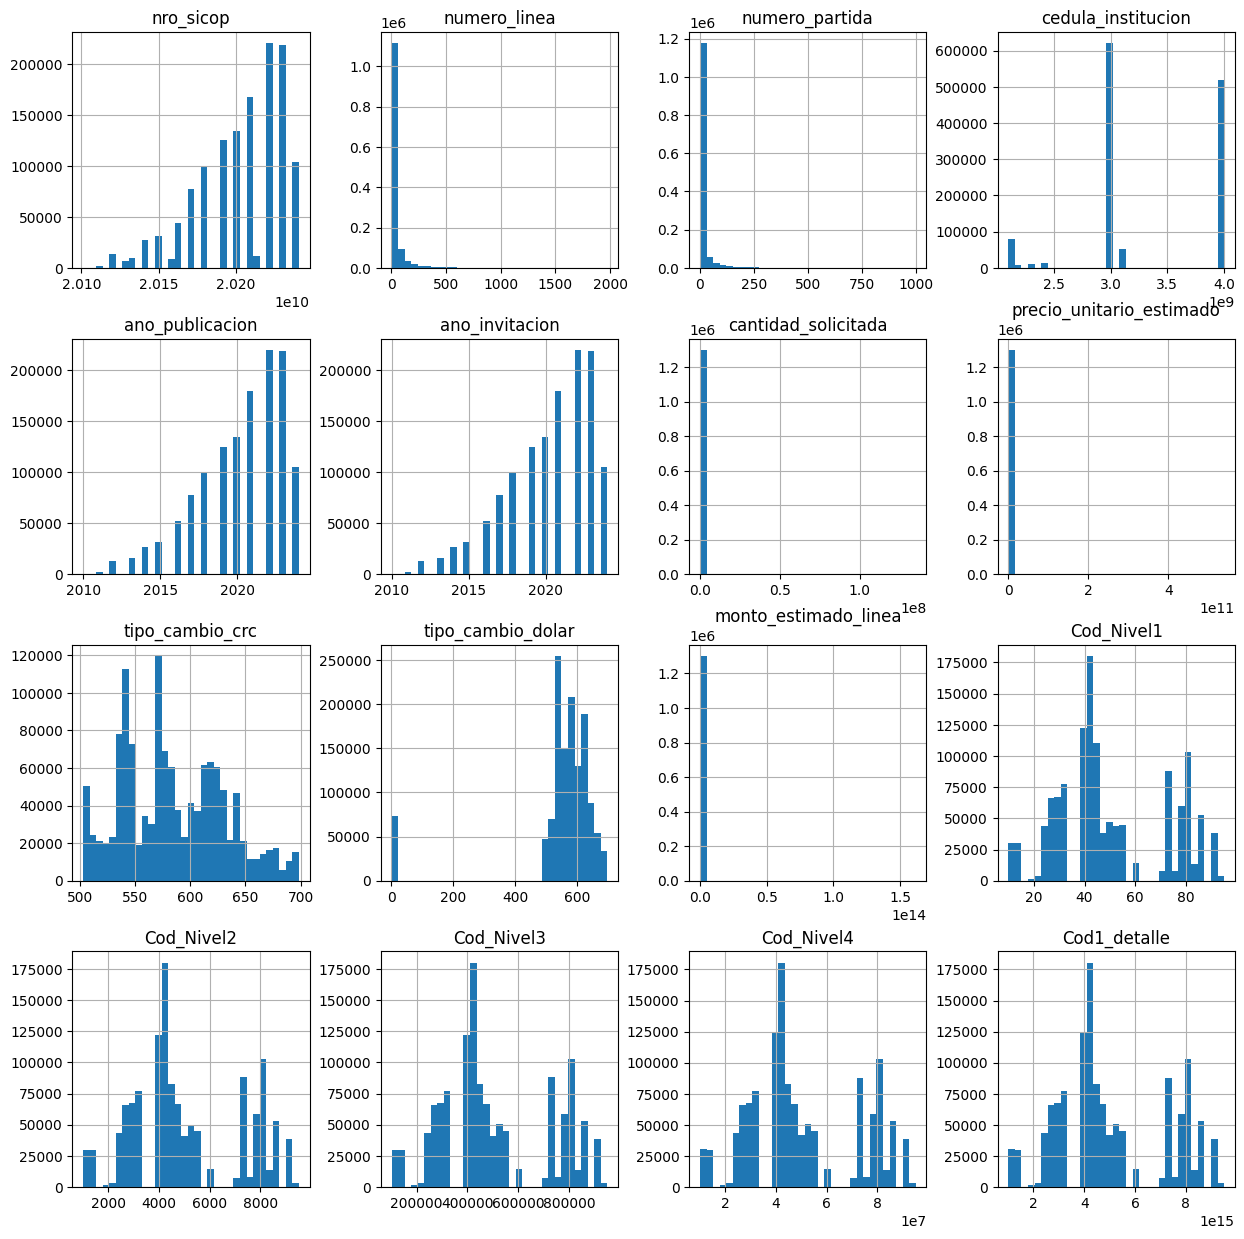

In [ ]:
#Histograma aplicado en cada una de las variables.
continuos.hist(bins=33, figsize=(15, 15))

<a id="section73"></a>
## <font color="#004D7F">7.3. Boxplot </font>

<Axes: >

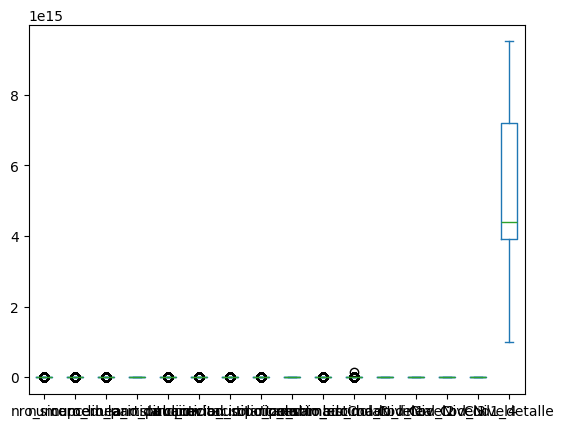

In [ ]:
%matplotlib inline
# Univariate Boxplot
continuos.plot(kind="box")

<a id="section74"></a>
## <font color="#004D7F">7.4. Valores únicos en cada variable del dataframe (categóricos) </font>

si quiero un análisis de cuales variables son categóricas

In [ ]:
categoricos=df.select_dtypes(include='object')

In [ ]:
categoricos.agg(['count', 'nunique']).transpose()

,count,nunique
Clave_iniciado_pk,1299998,1299899
subpartida_og,1249999,547
nombre_institucion,1299998,391
nro_procedimiento,1299998,260161
fecha_publicacion,1299998,258519
fecha_invitacion,1299998,259647
tipo_procedimiento,1299998,12
modalidad_procedimiento,1299926,20
excepcion_cd,735779,99
objeto_contractual,1299998,230867


Cuales categorías por columna

In [ ]:
for col in categoricos.columns:
  print ("* %s= tiene los valores únicos siguientes: %s." %(col, df[col].unique()))

* Clave_iniciado_pk= tiene los valores únicos siguientes: ['2016110137722517250492006241' '2019040108528111181292123892'
 '2013070015714321150392017791' ... '2023040075673121180390015178'
 '2022050290148111190192227970' '20240626926225310300192404732'].
* subpartida_og= tiene los valores únicos siguientes: ['2.04.02' '1.08.08' '5.01.05' '1.08.01' '2.99.01' '5.01.03' '1.07.01'
 '2.04.01' '1.01.01' '1.01.02' '2.02.03' '2.99.02' '2.99.04' '1.07.02'
 '2.99.05' '2.03.99' '2.99.06' '5.02.01' '1.04.06' '1.08.04' '1.08.05'
 '2.03.04' '2.01.02' '2.03.01' '1.08.99' '5.99.01' '5.03.01' '1.04.03'
 '2.99.07' '1.04.99' '1.06.03' '5.01.01' '1.01.04' '1.03.06' '2.03.06'
 '1.05.01' '2.99.99' '10805' '2.99.03' '1.08.03' '2.03.02' '1.03.02'
 '5.02.07' '5.99.99' '1.03.03' '5.99.03' '2.01.99' '5.02.99' '5.01.99'
 '5.01.07' '1.01.03' '1.08.07' '1.03.07' '2.01.04' '1.05.03' '5.01.06'
 '1.99.99' '1.04.04' '2.01.01' '5.02.02' '2.05.01' '5.01.04' '5.01.02'
 '1.08.02' nan '1.02.99' '1.03.01' '2.02.02' '1.04.01' 

<a id="section8"></a>
# <font color="#004D7F"> 8. Valores nulos</font>

<a id="section81"></a>
## <font color="#004D7F"> 8.1 Valores nulos individuales</font>

Cuando se quiere analizar los valores nulos de una variable específica

In [ ]:
#cantidad de valores nulos de la columna del indice
# df["sepal_length"].isnull().sum().sum()

<a id="section81"></a>
## <font color="#004D7F"> 8.2 Valores individuales en toda la tabla</font>

A continuación se presentan varias opciones, según cual se adecue mejor a las necesidades.
La siguiente es una función para obtener la cantidad de faltantes por variable en una lista

In [ ]:
#Funcion para datos faltantes
import numpy as np
def cantidad_faltantes(df):
    for col in df.columns.tolist():
        print('{} - valores faltantes: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [ ]:
cantidad_faltantes(df)

Clave_iniciado_pk - valores faltantes: 0
nro_sicop - valores faltantes: 0
numero_linea - valores faltantes: 0
numero_partida - valores faltantes: 0
subpartida_og - valores faltantes: 49999
cedula_institucion - valores faltantes: 0
nombre_institucion - valores faltantes: 0
nro_procedimiento - valores faltantes: 0
fecha_publicacion - valores faltantes: 0
fecha_invitacion - valores faltantes: 0
ano_publicacion - valores faltantes: 0
ano_invitacion - valores faltantes: 0
tipo_procedimiento - valores faltantes: 0
modalidad_procedimiento - valores faltantes: 72
excepcion_cd - valores faltantes: 564219
objeto_contractual - valores faltantes: 0
cantidad_solicitada - valores faltantes: 0
precio_unitario_estimado - valores faltantes: 0
tipo_moneda - valores faltantes: 0
tipo_cambio_crc - valores faltantes: 0
tipo_cambio_dolar - valores faltantes: 0
monto_estimado_linea - valores faltantes: 0
Cod_Nivel1 - valores faltantes: 5119
Nivel1_producto - valores faltantes: 5119
Cod_Nivel2 - valores falta

In [ ]:
null_df = pd.DataFrame({'null_counts':df.isna().sum().sort_values(ascending=False), 'null_pct':df.isna().sum()/df.shape[0] * 100}).T.astype(int).T
null_df

,null_counts,null_pct
Clave_iniciado_pk,0,0
Cod1_detalle,0,0
Cod_Nivel1,5119,0
Cod_Nivel2,5119,0
Cod_Nivel3,5119,0
Cod_Nivel4,158,0
Nivel1_producto,5119,0
Nivel2_producto,5119,0
Nivel3_producto,5119,0
Nivel4_producto,158,0


Este comando puede servir para obtener información detallada, el número de columna, el nombre, la cantidad de no-nulos y el tipo de variable de cada columna

In [ ]:
#df.info(verbose=True, null_counts=True)

Datos faltantes en orden descendente

In [ ]:
df.isna().sum().sort_values(ascending=False)

excepcion_cd                564219
subpartida_og                49999
Nivel2_producto               5119
Cod_Nivel2                    5119
Cod_Nivel1                    5119
Nivel1_producto               5119
Nivel3_producto               5119
Cod_Nivel3                    5119
detalle1_producto              158
Cod_Nivel4                     158
Nivel4_producto                158
modalidad_procedimiento         72
tipo_moneda                      0
monto_estimado_linea             0
Cod1_detalle                     0
tipo_cambio_dolar                0
tipo_cambio_crc                  0
Clave_iniciado_pk                0
precio_unitario_estimado         0
nro_sicop                        0
objeto_contractual               0
tipo_procedimiento               0
ano_invitacion                   0
ano_publicacion                  0
fecha_invitacion                 0
fecha_publicacion                0
nro_procedimiento                0
nombre_institucion               0
cedula_institucion  

Si quiero estimar cuantos faltan y eso cuanto representa

In [ ]:
#missing data
#hice el cambio para obtener el nombre de la  base
df_train=df
total = df_train.isnull().sum().sort_values(ascending=True)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.tail(73)

,Total,Percent
Clave_iniciado_pk,0,0.000000
monto_estimado_linea,0,0.000000
tipo_cambio_dolar,0,0.000000
tipo_cambio_crc,0,0.000000
tipo_moneda,0,0.000000
precio_unitario_estimado,0,0.000000
cantidad_solicitada,0,0.000000
Cod1_detalle,0,0.000000
tipo_procedimiento,0,0.000000
ano_invitacion,0,0.000000


Con este comando se puede visualizar los faltantes en la base, todos los amarillos son los faltantes, gráficamente

<Axes: >

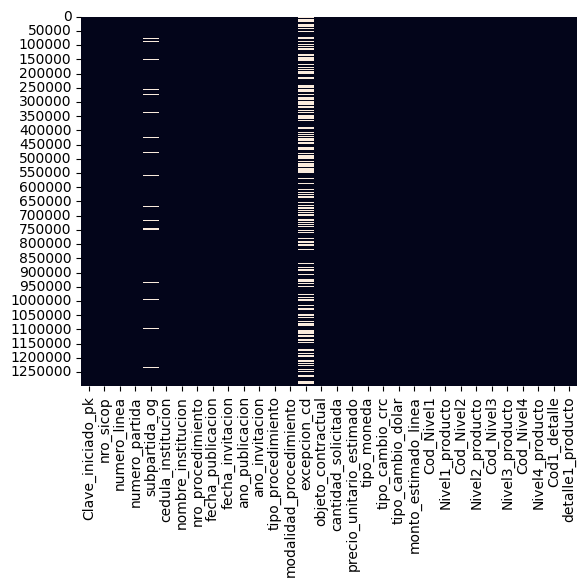

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

alternativa

<Axes: >

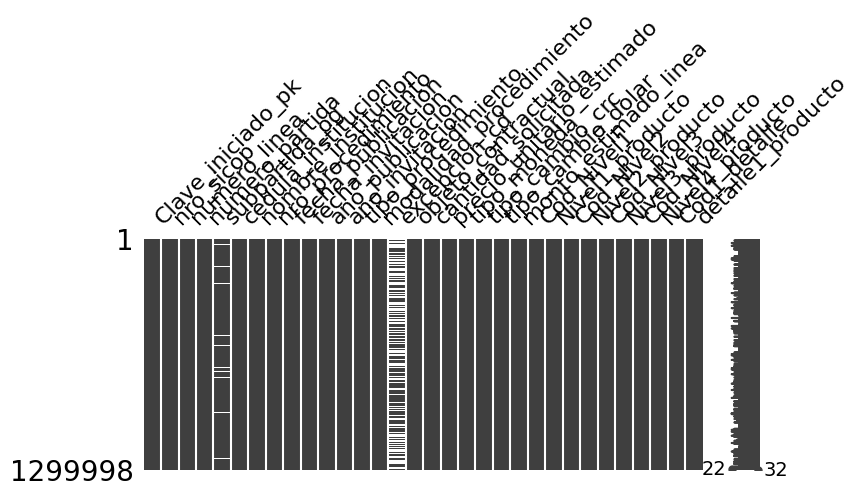

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(8,3))

<a id="section81"></a>
## <font color="#004D7F"> 8.3 correlación entre valores faltantes</font>

En este caso los que no tienen datos es porque no tienen suficientes datos faltantes para hacer el análisis. Es importante por que a partir de este se puede notar razones de porqué son faltantes

<Axes: >

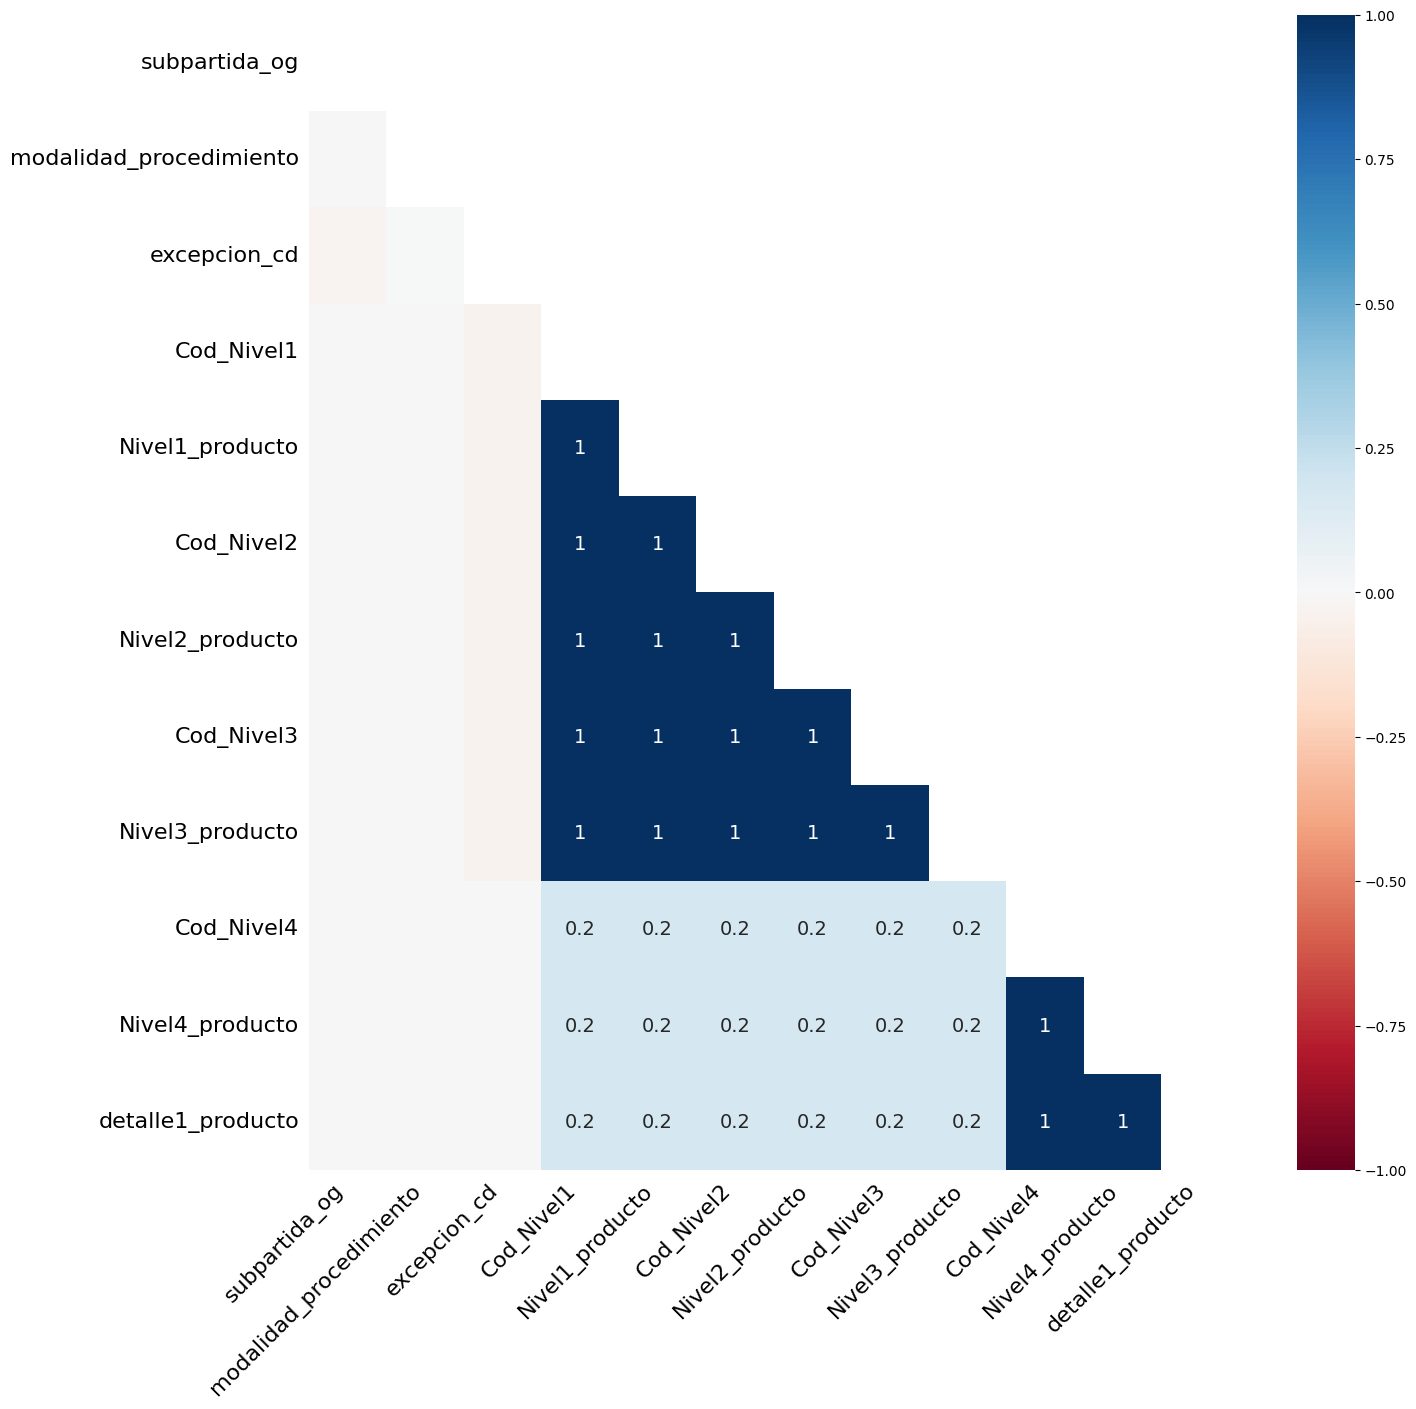

In [ ]:
msno.heatmap(df, figsize=(15,15))

<a id="section9"></a>
# <font color="#004D7F"> 9. Matriz de Dispersión por clase</font>

Los puntos en una matriz de diagrama de dispersión pueden ser coloreados por la etiqueta de clase en problemas de clasificación. Esto puede ayudarnos a detectar una separación clara (o no clara) de las clases y quizás a darnos una idea de lo difícil que puede ser el problema.

Al igual que el anterior gráfico los diagramas están dados por la interacción de los pares de atributos pero, en este caso, teniendo en cuenta la etiqueta clase.

In [ ]:
# %matplotlib inline
# sns.pairplot(df, hue="class")

In [ ]:
# %matplotlib inline

# #Correlation boxplot for clases

# plt.figure(1)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="sepal_length", data=df)
# plt.title("sepal_length")
# plt.grid(True)

# plt.figure(2)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="Sepal_width", data=df)
# plt.title("Sepal_width")
# plt.grid(True)


In [ ]:
# #Relación entre ...
# sns.catplot(x='sepal_length', y='Sepal_width', hue='class', kind = 'box', data = df)

<a id="section10"></a>
# <font color="#004D7F"> 10. Informe HTML de los datos</font>

Con el siguiente comando hacemos un reporte .html sobre cada una de las variables de la base, histograma y análisis individual

In [ ]:
# import sweetviz as sv
# #analyzing the dataset
# df_analysis=sv.analyze(df)
# #show analysis as html
# df_analysis.show_html('train_analysis.html')

In [ ]:
# # Crear el directorio si no existe
# import shutil
# destination_dir = 'dir2'
# os.makedirs(destination_dir, exist_ok=True)

# # Mover el archivo HTML a dir2
# source_path = 'train_analysis.html'
# destination_path = os.path.join(destination_dir, 'train_analysis.html')

# shutil.move(source_path, destination_path)

# print(f"Archivo guardado en: {destination_path}")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

In [ ]:
df.columns

Index(['Clave_iniciado_pk', 'nro_sicop', 'numero_linea', 'numero_partida',
       'subpartida_og', 'cedula_institucion', 'nombre_institucion',
       'nro_procedimiento', 'fecha_publicacion', 'fecha_invitacion',
       'ano_publicacion', 'ano_invitacion', 'tipo_procedimiento',
       'modalidad_procedimiento', 'excepcion_cd', 'objeto_contractual',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_moneda',
       'tipo_cambio_crc', 'tipo_cambio_dolar', 'monto_estimado_linea',
       'Cod_Nivel1', 'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto',
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto'],
      dtype='object')

<a id="section10"></a>
# <font color="#004D7F"> 11. Filtro </font>

In [ ]:
agnofilter= df.loc[df['ano_publicacion']>=2022]

In [ ]:
agnofilter['tipo_procedimiento'].value_counts()

tipo_procedimiento
LICITACIÓN REDUCIDA               195028
CONTRATACIÓN DIRECTA              154939
LICITACIÓN MENOR                   58051
LICITACIÓN ABREVIADA               40992
LICITACIÓN MAYOR                   37987
PROCEDIMIENTO POR EXCEPCIÓN        23424
LICITACIÓN PÚBLICA NACIONAL        15849
PROCEDIMIENTOS ESPECIALES           7023
CONTRATACIÓN ESPECIAL               5575
PROCEDIMIENTO POR PRINCIPIO         3899
LICITACIÓN PÚBLICA INTERNACION       143
SUBASTA INVERSA ELECTRÓNICA           53
Name: count, dtype: int64

In [ ]:
# Codificación dummie al conjunto de variables categóricas
cred_str_onehot = pd.get_dummies(agnofilter['tipo_procedimiento'])

# Convertir True a 1 y False a 0
cred_str_onehot = cred_str_onehot.astype(int)

# Unión de las variables numéricas con las codificadas
#cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)


In [ ]:
cred_str_onehot

,CONTRATACIÓN DIRECTA,CONTRATACIÓN ESPECIAL,LICITACIÓN ABREVIADA,LICITACIÓN MAYOR,LICITACIÓN MENOR,LICITACIÓN PÚBLICA INTERNACION,LICITACIÓN PÚBLICA NACIONAL,LICITACIÓN REDUCIDA,PROCEDIMIENTO POR EXCEPCIÓN,PROCEDIMIENTO POR PRINCIPIO,PROCEDIMIENTOS ESPECIALES,SUBASTA INVERSA ELECTRÓNICA
27,0,0,0,0,1,0,0,0,0,0,0,0
31,1,0,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,1,0,0,0,0,0,0,0
39,0,0,1,0,0,0,0,0,0,0,0,0
41,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299986,0,0,0,0,0,0,0,1,0,0,0,0
1299994,1,0,0,0,0,0,0,0,0,0,0,0
1299995,0,0,0,0,0,0,0,1,0,0,0,0
1299996,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tipofilter = agnofilter.loc[(agnofilter['tipo_procedimiento'] == "PROCEDIMIENTO POR EXCEPCIÓN")]

In [ ]:
tipofilter['tipo_procedimiento'].value_counts()

tipo_procedimiento
PROCEDIMIENTO POR EXCEPCIÓN    23424
Name: count, dtype: int64

In [ ]:
# Crear una tabla cruzada
crosstab_result = pd.crosstab(tipofilter['tipo_procedimiento'], tipofilter['ano_publicacion'])
crosstab_result

ano_publicacion,2022,2023,2024
tipo_procedimiento,,,
PROCEDIMIENTO POR EXCEPCIÓN,127,15185,8112


In [ ]:
# Convertir la columna 'tipo_procedimiento' en variables dummy
tipofilter_dummies = pd.get_dummies(tipofilter, columns=['tipo_procedimiento'], prefix='dummy')

In [ ]:
# Usar OneHotEncoder para convertir 'tipo_procedimiento' en variables dummy
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(agnofilter[['tipo_procedimiento']])
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Crear un DataFrame con las variables dummy
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['tipo_procedimiento']))

In [ ]:
encoded_df

,tipo_procedimiento_CONTRATACIÓN DIRECTA,tipo_procedimiento_CONTRATACIÓN ESPECIAL,tipo_procedimiento_LICITACIÓN ABREVIADA,tipo_procedimiento_LICITACIÓN MAYOR,tipo_procedimiento_LICITACIÓN MENOR,tipo_procedimiento_LICITACIÓN PÚBLICA INTERNACION,tipo_procedimiento_LICITACIÓN PÚBLICA NACIONAL,tipo_procedimiento_LICITACIÓN REDUCIDA,tipo_procedimiento_PROCEDIMIENTO POR EXCEPCIÓN,tipo_procedimiento_PROCEDIMIENTO POR PRINCIPIO,tipo_procedimiento_PROCEDIMIENTOS ESPECIALES,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
542958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
542959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
542961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)
corr_matrix = encoded_df.select_dtypes(include=['float64', 'int',"uint8","int32"]).corr(method='spearman')
tidy=tidy_corr_matrix(corr_matrix)
tidy

,variable_1,variable_2,r,abs_r
84,tipo_procedimiento_LICITACIÓN REDUCIDA,tipo_procedimiento_CONTRATACIÓN DIRECTA,-0.473097,0.473097
7,tipo_procedimiento_CONTRATACIÓN DIRECTA,tipo_procedimiento_LICITACIÓN REDUCIDA,-0.473097,0.473097
88,tipo_procedimiento_LICITACIÓN REDUCIDA,tipo_procedimiento_LICITACIÓN MENOR,-0.259044,0.259044
55,tipo_procedimiento_LICITACIÓN MENOR,tipo_procedimiento_LICITACIÓN REDUCIDA,-0.259044,0.259044
48,tipo_procedimiento_LICITACIÓN MENOR,tipo_procedimiento_CONTRATACIÓN DIRECTA,-0.218637,0.218637
...,...,...,...,...
23,tipo_procedimiento_CONTRATACIÓN ESPECIAL,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,-0.001006,0.001006
119,tipo_procedimiento_PROCEDIMIENTO POR PRINCIPIO,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,-0.000840,0.000840
141,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,tipo_procedimiento_PROCEDIMIENTO POR PRINCIPIO,-0.000840,0.000840
71,tipo_procedimiento_LICITACIÓN PÚBLICA INTERNACION,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,-0.000160,0.000160


In [ ]:

#Si se quiere extraer el cuadro de correlaciones porque es muy grande, se puede exportar a excel para ver con mayor claridad
#tidy.to_excel("corr.xlsx")

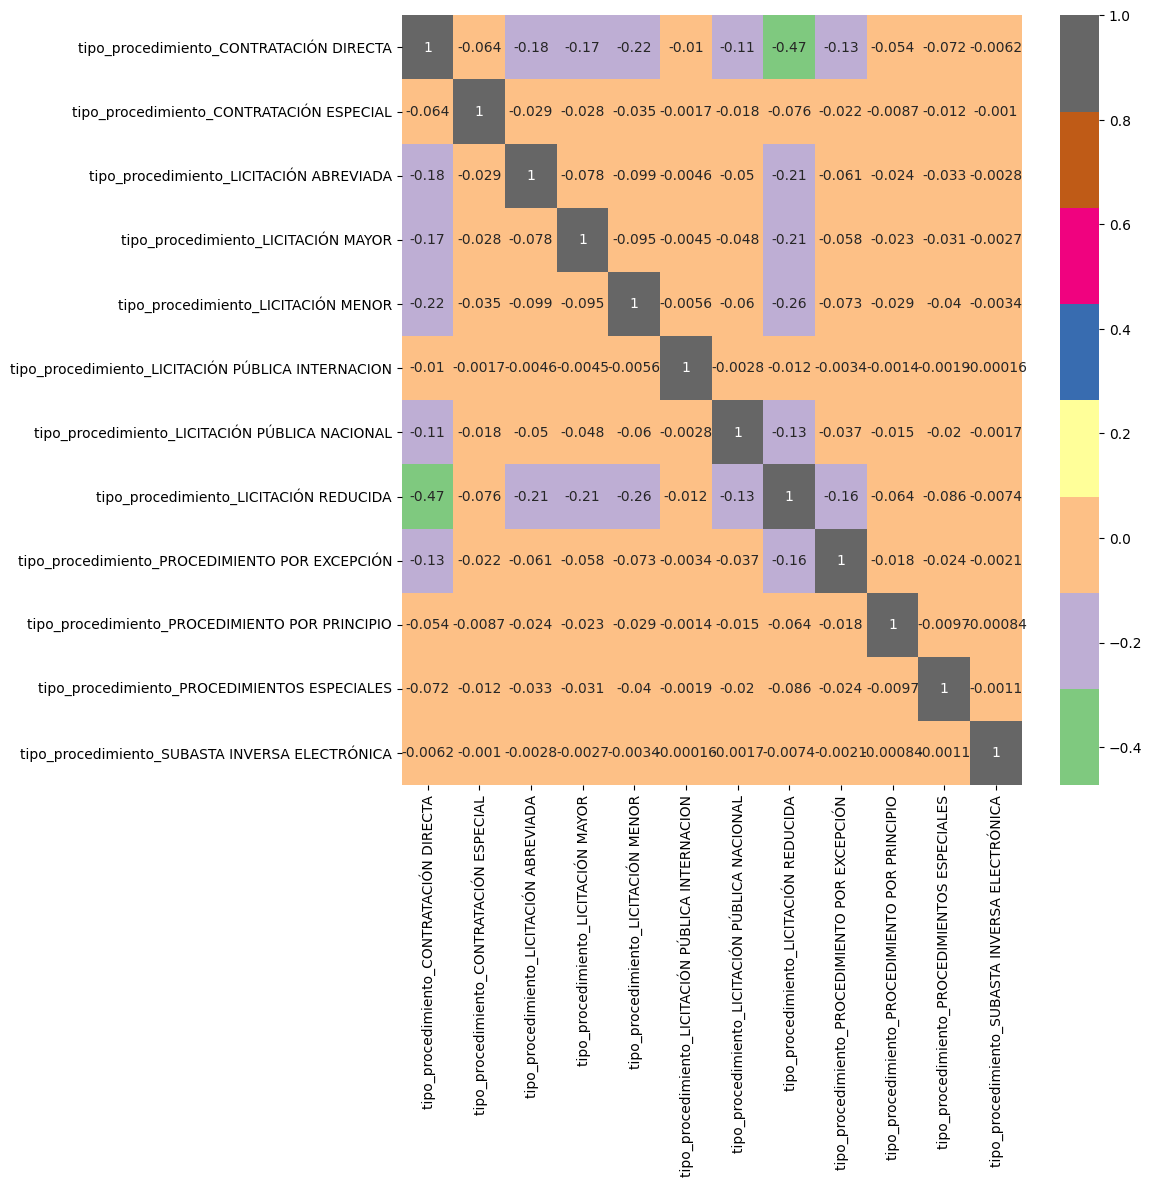

In [ ]:
#Con la siguiente matriz de correlación se puede ver un mapa de calor según el nivel de correlación, que obtuvimos en la estimación anterior
import seaborn as sns
#Matriz de correlación de variables continuas.
top_corr_features=corr_matrix.index
plt.figure(figsize=(10,10))
fig=sns.heatmap(encoded_df[top_corr_features].corr(),annot=True,
                cmap="Accent")

In [ ]:

# Lee el archivo Excel
adjudicados.columns

Index(['Clave_adjudicada_PK', 'nro_sicop', 'nro_acto', 'nro_oferta',
       'nro_linea', 'cedula_institucion', 'nombre_institucion',
       'cedula_proveedor', 'nombre_proveedor', 'tipo_proveedor',
       'tamano_proveedor', 'nro_procedimiento', 'fecha_publicacion',
       'ano_publicacion', 'fecha_adj_firme', 'ano_adjudicacion',
       'tipo_procedimiento', 'modalidad_procedimiento', 'excepcion_cd',
       'objeto_contractual', 'cantidad_adjudicada',
       'precio_unitario_adjudicado', 'tipo_moneda', 'tipo_cambio_crc',
       'tipo_cambio_dolar', 'monto_adjudicado_linea', 'Cod_Nivel1',
       'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto', 'Cod_Nivel3',
       'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto', 'Cod1_detalle',
       'detalle1_producto', 'Cod2_detalle', 'detalle2_producto',
       'Clave_adj_FK_proc', 'Clave_adj_FK_ofe'],
      dtype='object')

<a id="section10"></a>
# <font color="#004D7F"> 12. Abrir Adjudicados </font>

In [ ]:
adjudicados.shape

(1022402, 40)

In [ ]:
adjudicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022402 entries, 0 to 1022401
Data columns (total 40 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Clave_adjudicada_PK         1022402 non-null  object 
 1   nro_sicop                   1022402 non-null  int64  
 2   nro_acto                    1022402 non-null  int64  
 3   nro_oferta                  1022402 non-null  object 
 4   nro_linea                   1022402 non-null  int64  
 5   cedula_institucion          1022402 non-null  int64  
 6   nombre_institucion          1022402 non-null  object 
 7   cedula_proveedor            1022402 non-null  int64  
 8   nombre_proveedor            944850 non-null   object 
 9   tipo_proveedor              944850 non-null   object 
 10  tamano_proveedor            944850 non-null   object 
 11  nro_procedimiento           1022402 non-null  object 
 12  fecha_publicacion           1022402 non-null  object 
 1

In [ ]:
adjudicados["ano_publicacion"].value_counts()

ano_publicacion
2023    174516
2022    173603
2021    142794
2020    110157
2019    101291
2018     80875
2017     66526
2024     51217
2016     44394
2015     26256
2014     24353
2013     14421
2012     10841
2011      1155
2010         3
Name: count, dtype: int64

In [ ]:

adjudicados['tipo_procedimiento'].value_counts()

tipo_procedimiento
CONTRATACIÓN DIRECTA              585986
LICITACIÓN REDUCIDA               145624
LICITACIÓN ABREVIADA              124452
LICITACIÓN PÚBLICA NACIONAL        43693
LICITACIÓN MENOR                   37445
PROCEDIMIENTO POR PRINCIPIO        24707
PROCEDIMIENTO POR EXCEPCIÓN        18802
CONTRATACIÓN ESPECIAL              18750
LICITACIÓN MAYOR                   17707
PROCEDIMIENTOS ESPECIALES           5002
LICITACIÓN PÚBLICA INTERNACION       209
SUBASTA INVERSA ELECTRÓNICA           25
Name: count, dtype: int64

<a id="section10"></a>
# <font color="#004D7F"> 13. Filtro adjudicadas </font>

In [ ]:
agnofilteradj= adjudicados.loc[adjudicados['ano_publicacion']>=2022]

In [ ]:
agnofilteradj['tipo_procedimiento'].value_counts()

tipo_procedimiento
LICITACIÓN REDUCIDA               145624
CONTRATACIÓN DIRECTA              121427
LICITACIÓN MENOR                   37445
LICITACIÓN ABREVIADA               33446
PROCEDIMIENTO POR EXCEPCIÓN        18802
LICITACIÓN MAYOR                   17707
LICITACIÓN PÚBLICA NACIONAL        12849
PROCEDIMIENTOS ESPECIALES           5002
CONTRATACIÓN ESPECIAL               3967
PROCEDIMIENTO POR PRINCIPIO         2929
LICITACIÓN PÚBLICA INTERNACION       113
SUBASTA INVERSA ELECTRÓNICA           25
Name: count, dtype: int64

In [ ]:
# Codificación dummie al conjunto de variables categóricas
cred_str_onehot = pd.get_dummies(agnofilteradj['tipo_procedimiento'])

# Convertir True a 1 y False a 0
cred_str_onehot = cred_str_onehot.astype(int)

# Unión de las variables numéricas con las codificadas
#cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)


In [ ]:
cred_str_onehot

,CONTRATACIÓN DIRECTA,CONTRATACIÓN ESPECIAL,LICITACIÓN ABREVIADA,LICITACIÓN MAYOR,LICITACIÓN MENOR,LICITACIÓN PÚBLICA INTERNACION,LICITACIÓN PÚBLICA NACIONAL,LICITACIÓN REDUCIDA,PROCEDIMIENTO POR EXCEPCIÓN,PROCEDIMIENTO POR PRINCIPIO,PROCEDIMIENTOS ESPECIALES,SUBASTA INVERSA ELECTRÓNICA
436522,0,0,0,0,0,0,0,0,0,1,0,0
454732,1,0,0,0,0,0,0,0,0,0,0,0
455312,0,0,0,0,0,0,0,0,0,1,0,0
460730,1,0,0,0,0,0,0,0,0,0,0,0
467096,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1022397,0,0,0,0,0,0,0,1,0,0,0,0
1022398,0,0,0,0,0,0,0,1,0,0,0,0
1022399,0,0,0,0,0,0,0,1,0,0,0,0
1022400,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
tipofilteradj = agnofilteradj.loc[(agnofilteradj['tipo_procedimiento'] == "PROCEDIMIENTO POR EXCEPCIÓN")]

In [ ]:
tipofilteradj['tipo_procedimiento'].value_counts()

tipo_procedimiento
PROCEDIMIENTO POR EXCEPCIÓN    18802
Name: count, dtype: int64

In [ ]:
# Crear una tabla cruzada
crosstab_result = pd.crosstab(agnofilteradj['tipo_procedimiento'], agnofilteradj['ano_publicacion'])
crosstab_result

ano_publicacion,2022,2023,2024
tipo_procedimiento,,,
CONTRATACIÓN DIRECTA,121036,390,1
CONTRATACIÓN ESPECIAL,3959,8,0
LICITACIÓN ABREVIADA,32669,777,0
LICITACIÓN MAYOR,38,15869,1800
LICITACIÓN MENOR,76,29861,7508
LICITACIÓN PÚBLICA INTERNACION,113,0,0
LICITACIÓN PÚBLICA NACIONAL,12297,552,0
LICITACIÓN REDUCIDA,402,110907,34315
PROCEDIMIENTO POR EXCEPCIÓN,95,12955,5752


In [ ]:
exceadj = agnofilteradj.loc[
    (agnofilteradj['tipo_procedimiento'] == "PROCEDIMIENTO POR EXCEPCIÓN") ]

In [ ]:
os.chdir(dir2)
exceadj.to_excel("adjuntos.xlsx")

In [ ]:
exceadj['modalidad_procedimiento'].value_counts()

modalidad_procedimiento
Cantidad definida             10584
Servicios                      5402
Según demanda                  2814
Ejecución por consignación        2
Name: count, dtype: int64

In [ ]:
exceadj['Nivel1_producto'].value_counts()

Nivel1_producto
Servicios de Transporte, Almacenaje y Correo                                                                             5332
Servicios Educativos y de Formación                                                                                      4460
Servicios Editoriales, de Diseño, Gráficos y de Bellas Artes                                                             2067
Servicios basados en ingeniería, investigación y tecnología                                                              1320
Equipo, Accesorios y Suministros Médicos                                                                                  602
Servicios de construcción, mantenimiento y reparación de instalaciones o edificaciones                                    483
Servicios de Gestión, Profesionales de Empresa y Administrativos                                                          457
Productos Publicados                                                                                  

In [ ]:
exceadj.columns

Index(['Clave_adjudicada_PK', 'nro_sicop', 'nro_acto', 'nro_oferta',
       'nro_linea', 'cedula_institucion', 'nombre_institucion',
       'cedula_proveedor', 'nombre_proveedor', 'tipo_proveedor',
       'tamano_proveedor', 'nro_procedimiento', 'fecha_publicacion',
       'ano_publicacion', 'fecha_adj_firme', 'ano_adjudicacion',
       'tipo_procedimiento', 'modalidad_procedimiento', 'excepcion_cd',
       'objeto_contractual', 'cantidad_adjudicada',
       'precio_unitario_adjudicado', 'tipo_moneda', 'tipo_cambio_crc',
       'tipo_cambio_dolar', 'monto_adjudicado_linea', 'Cod_Nivel1',
       'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto', 'Cod_Nivel3',
       'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto', 'Cod1_detalle',
       'detalle1_producto', 'Cod2_detalle', 'detalle2_producto',
       'Clave_adj_FK_proc', 'Clave_adj_FK_ofe'],
      dtype='object')

In [ ]:
exceadj['nombre_proveedor'].value_counts()

nombre_proveedor
PURDY MOTOR SOCIEDAD ANONIMA                             847
AUTOCAMIONES DE COSTA RICA AUTO CORI SOCIEDAD ANONIMA    669
ACG ARISOL CONSULTING GROUP SOCIEDAD ANONIMA             569
COMERCIAL DE POTENCIA Y MAQUINARIA SOCIEDAD ANONIMA      558
INSTITUTO NACIONAL DE SEGUROS                            393
                                                        ... 
SERVICIOS DE MANTENIMIENTO CUBERO SOCIEDAD ANONIMA         1
MEZCLADORA VIQUEZ LIMITADA                                 1
CONCEPTOS E INSTRUMENTOS                                   1
ASOCIACION COSTARRICENSE DE OPERADORES DE TURISMO          1
UNIVERSIDAD HISPANOAMERICANA SOCIEDAD ANONIMA              1
Name: count, Length: 1317, dtype: int64

In [ ]:
exceadj['excepcion_cd'].value_counts()

excepcion_cd
Proveedor único (Inciso c del artículo 3 LGCP 9986)                                                                                      6953
Capacitación abierta (Inciso e del artículo 3 LGCP 9986)                                                                                 4365
Reparaciones indeterminadas (Inciso j del artículo 3 LGCP 9986)                                                                          3126
Medios de Comunicación social (Inciso d del artículo 3 LGCP 9986)                                                                        1353
La actividad contractual desarrollada entre sí por entes de derecho público (Inciso b del artículo 3 LGCP 9986)                          1157
Contratación por emergencia Ley 8488                                                                                                      935
Bienes y servicios artísticos culturales e intelectuales (Inciso i del artículo 3 LGCP 9986)                                           

En la normativa de contratación pública de Costa Rica, existen diversos tipos de procedimientos de licitación pública, cada uno con sus propias características y usos específicos. A continuación, se explica cada uno de los procedimientos mencionados:

**Contratación Directa:**
Descripción: Es un procedimiento en el que la administración pública contrata directamente con un proveedor, sin necesidad de un concurso o licitación pública.
Uso: Se utiliza generalmente en casos de emergencia, adquisiciones menores, o cuando se justifica que la competencia es inviable o innecesaria.

**Licitación Reducida:**
Descripción: Es un procedimiento de licitación con menos requisitos y formalidades comparado con la licitación pública tradicional.
Uso: Se emplea cuando los montos o la naturaleza del contrato no justifican un proceso de licitación más complejo.

**Licitación Abreviada:**
Descripción: Es un procedimiento más ágil y con plazos más cortos que la licitación ordinaria.
Uso: Se utiliza para contratos de menor cuantía o cuando se necesita una contratación rápida.

**Licitación Menor:**
Descripción: Es un proceso de licitación para contratos de bajo monto, con requisitos simplificados.
Uso: Adecuado para adquisiciones que no requieren procesos largos y detallados.

**Licitación Pública Nacional:**
Descripción: Es un procedimiento de licitación abierto a todos los proveedores nacionales, con requisitos más estrictos y plazos más largos.
Uso: Se utiliza para contratos de mayor cuantía o importancia, donde se busca la participación de una amplia gama de proveedores nacionales.

**Procedimiento por Excepción:**
Descripción: Es un procedimiento utilizado en situaciones excepcionales donde la licitación pública no es posible o conveniente.
Uso: Casos de emergencia, adquisiciones de bienes y servicios únicos, o situaciones específicas previstas por la normativa.

**Licitación Mayor:**
Descripción: Es un proceso de licitación para contratos de gran cuantía, con requisitos y formalidades completas.
Uso: Se emplea para proyectos grandes y complejos que requieren una evaluación exhaustiva de los oferentes.

**Procedimiento por Principio:**
Descripción: Es un procedimiento basado en principios generales de contratación pública, permitiendo flexibilidad en la selección del proveedor.
Uso: Se aplica en situaciones donde los procedimientos estándar no son adecuados, pero se requiere cumplir con principios de transparencia y competencia.

**Contratación Especial:**
Descripción: Es un procedimiento diseñado para situaciones específicas que no encajan en los procedimientos estándar de licitación.
Uso: Contrataciones de naturaleza especial, que requieren un tratamiento diferente debido a sus características únicas.

**Procedimientos Especiales:**
Descripción: Son procedimientos diseñados para atender necesidades específicas de contratación, fuera de los procedimientos regulares.
Uso: Situaciones particulares que requieren flexibilidad en la contratación.

**Licitación Pública Internacional:**
Descripción: Es un procedimiento abierto a proveedores internacionales, con requisitos que cumplen con estándares internacionales.
Uso: Se utiliza cuando se busca atraer a proveedores globales para proyectos de gran envergadura.

**Subasta Inversa Electrónica:**
Descripción: Es un procedimiento en el que los proveedores compiten en tiempo real para ofrecer el precio más bajo para un bien o servicio, a través de una plataforma electrónica.
Uso: Adquisiciones donde el precio es un factor decisivo y se busca la eficiencia mediante la competencia directa entre proveedores en línea.
Estos procedimientos están diseñados para asegurar la transparencia, la eficiencia, y la equidad en la contratación pública, adaptándose a las diferentes necesidades y contextos de las adquisiciones del sector público en Costa Rica.

In [ ]:
# Convertir la columna 'tipo_procedimiento' en variables dummy
tipofilter_dummies = pd.get_dummies(tipofilteradj, columns=['tipo_procedimiento'], prefix='dummy')

In [ ]:
# Usar OneHotEncoder para convertir 'tipo_procedimiento' en variables dummy
encoderadj = OneHotEncoder(sparse=False)
encodedadj = encoder.fit_transform(agnofilteradj[['tipo_procedimiento']])
encodedadj

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Crear un DataFrame con las variables dummy
encodedajd_df = pd.DataFrame(encodedadj, columns=encoder.get_feature_names_out(['tipo_procedimiento']))

In [ ]:
encodedajd_df

,tipo_procedimiento_CONTRATACIÓN DIRECTA,tipo_procedimiento_CONTRATACIÓN ESPECIAL,tipo_procedimiento_LICITACIÓN ABREVIADA,tipo_procedimiento_LICITACIÓN MAYOR,tipo_procedimiento_LICITACIÓN MENOR,tipo_procedimiento_LICITACIÓN PÚBLICA INTERNACION,tipo_procedimiento_LICITACIÓN PÚBLICA NACIONAL,tipo_procedimiento_LICITACIÓN REDUCIDA,tipo_procedimiento_PROCEDIMIENTO POR EXCEPCIÓN,tipo_procedimiento_PROCEDIMIENTO POR PRINCIPIO,tipo_procedimiento_PROCEDIMIENTOS ESPECIALES,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
399331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
399332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
399333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
399334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)
corr_matrix = encodedajd_df.select_dtypes(include=['float64', 'int',"uint8","int32"]).corr(method='spearman')
tidy=tidy_corr_matrix(corr_matrix)
tidy

,variable_1,variable_2,r,abs_r
7,tipo_procedimiento_CONTRATACIÓN DIRECTA,tipo_procedimiento_LICITACIÓN REDUCIDA,-0.500786,0.500786
84,tipo_procedimiento_LICITACIÓN REDUCIDA,tipo_procedimiento_CONTRATACIÓN DIRECTA,-0.500786,0.500786
88,tipo_procedimiento_LICITACIÓN REDUCIDA,tipo_procedimiento_LICITACIÓN MENOR,-0.243699,0.243699
55,tipo_procedimiento_LICITACIÓN MENOR,tipo_procedimiento_LICITACIÓN REDUCIDA,-0.243699,0.243699
31,tipo_procedimiento_LICITACIÓN ABREVIADA,tipo_procedimiento_LICITACIÓN REDUCIDA,-0.229057,0.229057
...,...,...,...,...
23,tipo_procedimiento_CONTRATACIÓN ESPECIAL,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,-0.000793,0.000793
119,tipo_procedimiento_PROCEDIMIENTO POR PRINCIPIO,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,-0.000680,0.000680
141,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,tipo_procedimiento_PROCEDIMIENTO POR PRINCIPIO,-0.000680,0.000680
71,tipo_procedimiento_LICITACIÓN PÚBLICA INTERNACION,tipo_procedimiento_SUBASTA INVERSA ELECTRÓNICA,-0.000133,0.000133


In [ ]:

#Si se quiere extraer el cuadro de correlaciones porque es muy grande, se puede exportar a excel para ver con mayor claridad
#tidy.to_excel("corr.xlsx")

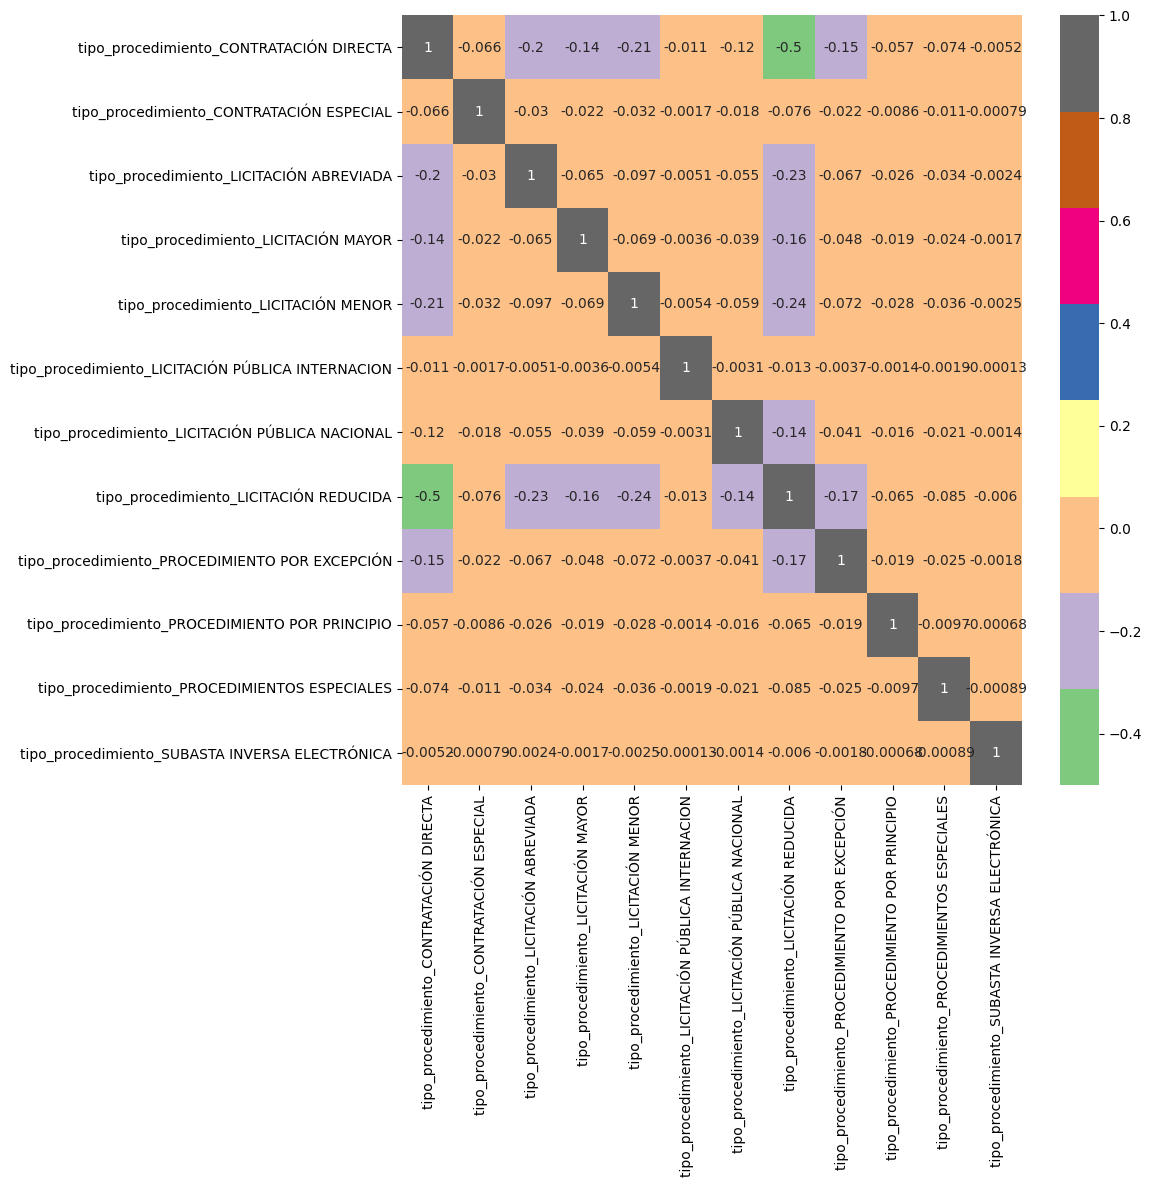

In [ ]:
#Con la siguiente matriz de correlación se puede ver un mapa de calor según el nivel de correlación, que obtuvimos en la estimación anterior
import seaborn as sns
#Matriz de correlación de variables continuas.
top_corr_features=corr_matrix.index
plt.figure(figsize=(10,10))
fig=sns.heatmap(encodedajd_df [top_corr_features].corr(),annot=True,
                cmap="Accent")

In [ ]:
exceadj.columns

Index(['Clave_adjudicada_PK', 'nro_sicop', 'nro_acto', 'nro_oferta',
       'nro_linea', 'cedula_institucion', 'nombre_institucion',
       'cedula_proveedor', 'nombre_proveedor', 'tipo_proveedor',
       'tamano_proveedor', 'nro_procedimiento', 'fecha_publicacion',
       'ano_publicacion', 'fecha_adj_firme', 'ano_adjudicacion',
       'tipo_procedimiento', 'modalidad_procedimiento', 'excepcion_cd',
       'objeto_contractual', 'cantidad_adjudicada',
       'precio_unitario_adjudicado', 'tipo_moneda', 'tipo_cambio_crc',
       'tipo_cambio_dolar', 'monto_adjudicado_linea', 'Cod_Nivel1',
       'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto', 'Cod_Nivel3',
       'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto', 'Cod1_detalle',
       'detalle1_producto', 'Cod2_detalle', 'detalle2_producto',
       'Clave_adj_FK_proc', 'Clave_adj_FK_ofe'],
      dtype='object')

In [ ]:
exceadj.shape

(18802, 40)

In [ ]:
os.chdir(dir2)
exceadj.to_excel("adjuntos.xlsx")

In [ ]:
# # Crear el grafo
# import networkx as nx
# from pyvis.network import Network

# # Crear el grafo
# G = nx.Graph()

# # Añadir nodos y aristas
# for index, row in df.iterrows():
#     institucion = str(row['nombre_institucion'])
#     proveedor = str(row['nombre_proveedor'])
#     Nivel1_producto = row['Nivel1_producto']

#     G.add_node(institucion, tipo='institucion', title=institucion)
#     G.add_node(proveedor, tipo='proveedor', title=proveedor)
#     G.add_edge(institucion, proveedor, Nivel1_producto=Nivel1_producto)

# # Crear una red interactiva con pyvis
# net = Network(notebook=True)
# net.from_nx(G)

# # Opciones de visualización
# for node in net.nodes:
#     if G.nodes[node['id']]['tipo'] == 'institucion':
#         node['color'] = 'blue'
#         node['title'] = f"{node['id']} (Institución)"
#     elif G.nodes[node['id']]['tipo'] == 'proveedor':
#         node['color'] = 'green'
#         node['title'] = f"{node['id']} (Proveedor)"

# for edge in net.edges:
#     u = edge['from']
#     v = edge['to']
#     Nivel1_producto = G.edges[u, v]['Nivel1_producto']
#     edge['title'] = Nivel1_producto

# # Guardar la visualización en un archivo HTML
# net.show('network.html')

In [ ]:
ofertados.columns

Index(['Clave_ofertada_PK', 'nro_sicop', 'nro_oferta', 'nro_linea',
       'cedula_institucion', 'nombre_institucion', 'cedula_proveedor',
       'nombre_proveedor', 'tipo_proveedor', 'tamano_proveedor',
       'nro_procedimiento', 'fecha_publicacion', 'ano_publicacion',
       'fecha_presenta_oferta', 'ano_oferta', 'tipo_procedimiento',
       'modalidad_procedimiento', 'excepcion_cd', 'objeto_contractual',
       'cantidad_ofertada', 'precio_unitario_ofertado', 'tipo_moneda',
       'tipo_cambio_crc', 'tipo_cambio_dolar', 'monto_ofertado_linea',
       'Cod_Nivel1', 'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto',
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto', 'Cod2_detalle',
       'detalle2_producto', 'Clave_of_FK_proc'],
      dtype='object')

In [ ]:
tipofilter.columns

Index(['Clave_iniciado_pk', 'nro_sicop', 'numero_linea', 'numero_partida',
       'subpartida_og', 'cedula_institucion', 'nombre_institucion',
       'nro_procedimiento', 'fecha_publicacion', 'fecha_invitacion',
       'ano_publicacion', 'ano_invitacion', 'tipo_procedimiento',
       'modalidad_procedimiento', 'excepcion_cd', 'objeto_contractual',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_moneda',
       'tipo_cambio_crc', 'tipo_cambio_dolar', 'monto_estimado_linea',
       'Cod_Nivel1', 'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto',
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto'],
      dtype='object')

In [ ]:
tipofilter.head(5)

,Clave_iniciado_pk,nro_sicop,numero_linea,numero_partida,subpartida_og,cedula_institucion,nombre_institucion,nro_procedimiento,fecha_publicacion,fecha_invitacion,ano_publicacion,ano_invitacion,tipo_procedimiento,modalidad_procedimiento,excepcion_cd,objeto_contractual,cantidad_solicitada,precio_unitario_estimado,tipo_moneda,tipo_cambio_crc,tipo_cambio_dolar,monto_estimado_linea,Cod_Nivel1,Nivel1_producto,Cod_Nivel2,Nivel2_producto,Cod_Nivel3,Nivel3_producto,Cod_Nivel4,Nivel4_producto,Cod1_detalle,detalle1_producto
70,2024021380924218200392331240,20240213809,2,1,2.04.02,4000042147,CAJA COSTARRICENSE DE SEGURO SOCIAL,2024PX-000001-0001102702,2024-02-01 10:06:40,2024-02-01 10:06:40,2024,2024,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,Compra de repuesto para Colposcopio del Hospit...,1.0,270.00,USD,520.78,1.00,140610.60,42.0,"Equipo, Accesorios y Suministros Médicos",4218.0,Exámenes de pacientes y productos de monitoreo,421820.0,"Especulo, scopios y accesorios para uso del re...",42182003.0,Colposcopios o vaginoscopios,4218200392331240,REPUESTOS PARA COLPOSCOPIO.
127,2023100194648111219992302517,20231001946,4,4,5.01.07,4000042149,UNIVERSIDAD DE COSTA RICA,2023PX-000032-0000900001,2023-10-13 18:04:11,2023-10-13 18:04:11,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,SUSCRIPCIÓN A RECURSOS DE INFORMACIÓN Dot Lib ...,1.0,3134320.00,CRC,534.52,534.52,3134320.00,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811121.0,Servicios de Internet,81112199.0,Servicios de indexación de datos y contenidos ...,8111219992302517,"RECURSO ELECTRÓNICO ARTSTOR LIBRARY-ARTSTOR, T..."
155,2023080350218111190292374970,20230803502,1,1,1.03.07,4000001902,INSTITUTO NACIONAL DE SEGUROS,2023PX-000141-0001000001,2023-08-30 12:57:56,2023-08-30 12:57:56,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Servicios,Proveedor único (Inciso c del artículo 3 LGCP ...,Membresía Base de datos Ilibrary OCDE,1.0,4331598.00,CRC,541.94,541.94,4331598.00,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811119.0,Sistemas de recuperación de la información,81111902.0,Recuperación de la información de la base de d...,8111190292374970,ACCESO AL RECURSO ELECTRONICO OECD ILIBRARY. F...
201,2023100113695510159692204208,20231001136,9,9,2.99.03,4000042151,UNIVERSIDAD ESTATAL A DISTANCIA,2023PX-000076-0017699999,2023-10-17 10:58:00,2023-10-17 10:58:19,2023,2023,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,"COMPRA DE LIBROS PAC I 2024, MCGRAW HILL INTER...",45.0,19045.00,CRC,535.02,535.02,857025.00,55.0,Productos Publicados,5510.0,Medios impresos,551015.0,Publicaciones impresas,55101596.0,Libros de texto de ciencias económicas,5510159692204208,LIBRO CONTABILIDAD ADMINISTRATIVA: UN ENFOQUE ...
245,20240525524248111219992302105,20240525524,24,1,NaN,4000042149,UNIVERSIDAD DE COSTA RICA,2024PX-000018-0000900001,2024-05-30 10:21:34,2024-05-30 10:21:34,2024,2024,PROCEDIMIENTO POR EXCEPCIÓN,Cantidad definida,Proveedor único (Inciso c del artículo 3 LGCP ...,Suscripción recursos electrónicos de informaci...,1.0,1089845.96,CRC,527.11,527.11,1089845.96,81.0,"Servicios basados en ingeniería, investigación...",8111.0,"Servicios informáticos,de computación, audio y...",811121.0,Servicios de Internet,81112199.0,Servicios de indexación de datos y contenidos ...,8111219992302105,"BASE DE DATOS ARTS AND SCIENCE VIII , FORMATO ..."


In [ ]:
adjudicados.columns

Index(['Clave_adjudicada_PK', 'nro_sicop', 'nro_acto', 'nro_oferta',
       'nro_linea', 'cedula_institucion', 'nombre_institucion',
       'cedula_proveedor', 'nombre_proveedor', 'tipo_proveedor',
       'tamano_proveedor', 'nro_procedimiento', 'fecha_publicacion',
       'ano_publicacion', 'fecha_adj_firme', 'ano_adjudicacion',
       'tipo_procedimiento', 'modalidad_procedimiento', 'excepcion_cd',
       'objeto_contractual', 'cantidad_adjudicada',
       'precio_unitario_adjudicado', 'tipo_moneda', 'tipo_cambio_crc',
       'tipo_cambio_dolar', 'monto_adjudicado_linea', 'Cod_Nivel1',
       'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto', 'Cod_Nivel3',
       'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto', 'Cod1_detalle',
       'detalle1_producto', 'Cod2_detalle', 'detalle2_producto',
       'Clave_adj_FK_proc', 'Clave_adj_FK_ofe'],
      dtype='object')

In [ ]:
ofertados.columns

Index(['Clave_ofertada_PK', 'nro_sicop', 'nro_oferta', 'nro_linea',
       'cedula_institucion', 'nombre_institucion', 'cedula_proveedor',
       'nombre_proveedor', 'tipo_proveedor', 'tamano_proveedor',
       'nro_procedimiento', 'fecha_publicacion', 'ano_publicacion',
       'fecha_presenta_oferta', 'ano_oferta', 'tipo_procedimiento',
       'modalidad_procedimiento', 'excepcion_cd', 'objeto_contractual',
       'cantidad_ofertada', 'precio_unitario_ofertado', 'tipo_moneda',
       'tipo_cambio_crc', 'tipo_cambio_dolar', 'monto_ofertado_linea',
       'Cod_Nivel1', 'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto',
       'Cod_Nivel3', 'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto',
       'Cod1_detalle', 'detalle1_producto', 'Cod2_detalle',
       'detalle2_producto', 'Clave_of_FK_proc'],
      dtype='object')

In [ ]:
tipofilter.rename(columns={'numero_linea':'nro_linea'}, inplace=True)

In [ ]:
# Realizar la fusión de los DataFrames
uni1 = tipofilter.merge(ofertados, on=['nro_sicop', 'nro_linea'], how='left')

In [ ]:
uni1.shape, tipofilter.shape, ofertados.shape

((26316, 68), (23424, 32), (3469326, 38))

In [ ]:
uni1[['nombre_institucion_y','nombre_institucion_y']]

,nombre_institucion_y,nombre_institucion_y
0,CAJA COSTARRICENSE DE SEGURO SOCIAL,CAJA COSTARRICENSE DE SEGURO SOCIAL
1,UNIVERSIDAD DE COSTA RICA,UNIVERSIDAD DE COSTA RICA
2,INSTITUTO NACIONAL DE SEGUROS,INSTITUTO NACIONAL DE SEGUROS
3,UNIVERSIDAD ESTATAL A DISTANCIA,UNIVERSIDAD ESTATAL A DISTANCIA
4,UNIVERSIDAD DE COSTA RICA,UNIVERSIDAD DE COSTA RICA
...,...,...
26311,BANCO POPULAR Y DE DESARROLLO COMUNAL,BANCO POPULAR Y DE DESARROLLO COMUNAL
26312,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...
26313,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...
26314,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...,COMISION NACIONAL DE PREVENCION DE RIESGOS Y A...


In [ ]:
uni1.columns

Index(['Clave_iniciado_pk', 'nro_sicop', 'nro_linea', 'numero_partida',
       'subpartida_og', 'cedula_institucion_x', 'nombre_institucion_x',
       'nro_procedimiento_x', 'fecha_publicacion_x', 'fecha_invitacion',
       'ano_publicacion_x', 'ano_invitacion', 'tipo_procedimiento_x',
       'modalidad_procedimiento_x', 'excepcion_cd_x', 'objeto_contractual_x',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_moneda_x',
       'tipo_cambio_crc_x', 'tipo_cambio_dolar_x', 'monto_estimado_linea',
       'Cod_Nivel1_x', 'Nivel1_producto_x', 'Cod_Nivel2_x',
       'Nivel2_producto_x', 'Cod_Nivel3_x', 'Nivel3_producto_x',
       'Cod_Nivel4_x', 'Nivel4_producto_x', 'Cod1_detalle_x',
       'detalle1_producto_x', 'Clave_ofertada_PK', 'nro_oferta',
       'cedula_institucion_y', 'nombre_institucion_y', 'cedula_proveedor',
       'nombre_proveedor', 'tipo_proveedor', 'tamano_proveedor',
       'nro_procedimiento_y', 'fecha_publicacion_y', 'ano_publicacion_y',
       'fecha_prese

In [ ]:
# Comparar las dos columnas y crear una nueva columna 'Comparacion'
uni1['Comparacion'] = uni1.apply(lambda row: 'Igual' if row['Nivel1_producto_x'] == row['Nivel1_producto_y'] else 'Diferente', axis=1)

In [ ]:
uni1['Comparacion'].value_counts()

Comparacion
Igual        23503
Diferente     2813
Name: count, dtype: int64

In [ ]:
uni1["Nivel1_producto_y"].isnull().sum()

2813

In [ ]:
ver= uni1[['Nivel1_producto_x', 'Nivel1_producto_y','Comparacion']]
ver.loc[(ver['Comparacion']== "Diferente")&(ver['Nivel1_producto_y'].notnull())].head(20)


,Nivel1_producto_x,Nivel1_producto_y,Comparacion


In [ ]:
uni1.shape, adjudicados.shape, tipofilter.shape

((26316, 69), (1022402, 40), (23424, 32))

In [ ]:
uni1.columns

Index(['Clave_iniciado_pk', 'nro_sicop', 'nro_linea', 'numero_partida',
       'subpartida_og', 'cedula_institucion_x', 'nombre_institucion_x',
       'nro_procedimiento_x', 'fecha_publicacion_x', 'fecha_invitacion',
       'ano_publicacion_x', 'ano_invitacion', 'tipo_procedimiento_x',
       'modalidad_procedimiento_x', 'excepcion_cd_x', 'objeto_contractual_x',
       'cantidad_solicitada', 'precio_unitario_estimado', 'tipo_moneda_x',
       'tipo_cambio_crc_x', 'tipo_cambio_dolar_x', 'monto_estimado_linea',
       'Cod_Nivel1_x', 'Nivel1_producto_x', 'Cod_Nivel2_x',
       'Nivel2_producto_x', 'Cod_Nivel3_x', 'Nivel3_producto_x',
       'Cod_Nivel4_x', 'Nivel4_producto_x', 'Cod1_detalle_x',
       'detalle1_producto_x', 'Clave_ofertada_PK', 'nro_oferta',
       'cedula_institucion_y', 'nombre_institucion_y', 'cedula_proveedor',
       'nombre_proveedor', 'tipo_proveedor', 'tamano_proveedor',
       'nro_procedimiento_y', 'fecha_publicacion_y', 'ano_publicacion_y',
       'fecha_prese

In [ ]:
adjudicados.columns

Index(['Clave_adjudicada_PK', 'nro_sicop', 'nro_acto', 'nro_oferta',
       'nro_linea', 'cedula_institucion', 'nombre_institucion',
       'cedula_proveedor', 'nombre_proveedor', 'tipo_proveedor',
       'tamano_proveedor', 'nro_procedimiento', 'fecha_publicacion',
       'ano_publicacion', 'fecha_adj_firme', 'ano_adjudicacion',
       'tipo_procedimiento', 'modalidad_procedimiento', 'excepcion_cd',
       'objeto_contractual', 'cantidad_adjudicada',
       'precio_unitario_adjudicado', 'tipo_moneda', 'tipo_cambio_crc',
       'tipo_cambio_dolar', 'monto_adjudicado_linea', 'Cod_Nivel1',
       'Nivel1_producto', 'Cod_Nivel2', 'Nivel2_producto', 'Cod_Nivel3',
       'Nivel3_producto', 'Cod_Nivel4', 'Nivel4_producto', 'Cod1_detalle',
       'detalle1_producto', 'Cod2_detalle', 'detalle2_producto',
       'Clave_adj_FK_proc', 'Clave_adj_FK_ofe'],
      dtype='object')

In [ ]:
# Realizar la fusión de los DataFrames
uni2 = uni1.merge(adjudicados, on=['nro_linea', 'nro_oferta', ], how='left')

In [ ]:
uni2.shape, uni1.shape, adjudicados.shape, tipofilter.shape

((26501, 107), (26316, 69), (1022402, 40), (23424, 32))

In [ ]:
uni2.to_csv("uni2.csv")

In [ ]:
uni2.to_excel("uni2.xlsx")

In [ ]:
uni2.columns

<a id="section10"></a>
# <font color="#004D7F"> 13. Merge adjudicadas e iniciadas </font>

In [ ]:

# Crear una tabla cruzada
crosstab_result = pd.crosstab(uni2['tipo_procedimiento'], uni2['ano_publicacion'])
crosstab_result

ano_publicacion,2022.0,2023.0,2024.0
tipo_procedimiento,,,
PROCEDIMIENTO POR EXCEPCIÓN,95,12955,5752


In [ ]:
os.getcwd()

'C:\\Users\\114310416\\Documents\\Data Challenge\\Resultados Finales'

In [ ]:
import sweetviz as sv
#analyzing the dataset
df_analysis=sv.analyze(uni2)
#show analysis as html
df_analysis.show_html('train_analysis.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


Report train_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
